Import Data

In [231]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mlt

data = pd.read_stata("callreports_final.dta", chunksize=100000, preserve_dtypes=True)

df_raw = pd.DataFrame()

for chunk in data:
    df_raw=df_raw.append(chunk)

Additional Settings

In [232]:
%matplotlib inline
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
from matplotlib import ticker
import matplotlib.patches as mpatches
from scipy.stats import pearsonr
from matplotlib import cm
import datetime
import itertools
import scipy.stats as scipy

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.set_option('mode.chained_assignment', None)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 18

#setting matplotlib style
plt.style.use('default')

#setting params for matplolib plots
plt.rcParams['font.size']=BIGGER_SIZE          # controls default text sizes
plt.rcParams['axes.titlesize']=BIGGER_SIZE     # fontsize of the axes title
plt.rcParams['axes.labelsize']=BIGGER_SIZE    # fontsize of the x and y labels
plt.rcParams['xtick.labelsize']=BIGGER_SIZE    # fontsize of the tick labels
plt.rcParams['ytick.labelsize']=BIGGER_SIZE    # fontsize of the tick labels
plt.rcParams['legend.fontsize']=BIGGER_SIZE    # legend fontsize
plt.rcParams['figure.titlesize']=BIGGER_SIZE  # fontsize of the figure title
plt.rcParams['xtick.bottom']=True  # fontsize of the figure title
plt.rcParams['xtick.major.bottom']=True  # fontsize of the figure title
plt.rcParams['xtick.major.size']=3.5  # fontsize of the figure title
#plt.rcParams['xtick.major.width']=1  # fontsize of the figure title
plt.rcParams['xtick.major.top']=False  # fontsize of the figure title
plt.rcParams['xtick.minor.bottom']=True  # fontsize of the figure title
plt.rcParams['xtick.minor.size']=3  # fontsize of the figure title
#plt.rcParams['legend.fontsize'] = 22

#setting grid style
plt.rcParams['grid.color'] = 'k'
#plt.rcParams['grid.linestyle'] = ':'
plt.rcParams['grid.linewidth'] = 0.5

#figsizes
figsize_OneGraph=(20,10)



categories = ["Top 10", "Top 11-100", "Top 101-1000", "Top 1000-∞"]

Structural adjustments on dataset

In [233]:
#removing investment banks Goldman Sachs and Morgan Stanley
df_raw = df_raw[(df_raw.rssdid!=1456501) & (df_raw.bhcid!=2380443)]

Parse time

In [234]:
df_raw["date"] = pd.to_datetime(df_raw.date, format='%Y%m%d')

Timeseries labels for xaxis 

In [235]:
years = [str(year) for year in range(1976, 2014)]

years16 = [str(year) for year in range(1976, 2014, 4)]

Functions for plotting crisis shades on graph

In [236]:
def plot_crisis(ax):
    #1980Q1-Q3 crisis
    ax.axvspan(16, 19, alpha=0.5, color='gray')


    #1981Q3-1982Q4 crisis
    ax.axvspan(22, 27, alpha=0.5, color='gray')

    #1990Q3-1991Q2 crisis
    ax.axvspan(58, 61, alpha=0.5, color='gray')

    #2001Q2-2001Q4 crisis
    ax.axvspan(101, 103, alpha=0.5, color='gray')

    #2007Q4-2009Q3 crisis
    ax.axvspan(127, 134, alpha=0.5, color='gray')


In [237]:
'''
Takes xaxis with datetime objects
'''
def plot_crisis_datetime(ax):
    #1980 crisis
    ax.axvspan(datetime.datetime(1980,3,31), datetime.datetime(1980,9,30), alpha=0.5, color='gray')
    
    
    #1981Q3-1982Q4 crisis
    ax.axvspan(datetime.datetime(1981,9,30), datetime.datetime(1982,12,31), alpha=0.5, color='gray')
    
    #1990Q3-1991Q2 crisis
    ax.axvspan(datetime.datetime(1990,9,30), datetime.datetime(1991,6,30), alpha=0.5, color='gray')
    
    #2001Q2-2001Q4 crisis
    ax.axvspan(datetime.datetime(2001,6,30), datetime.datetime(2001,12,31), alpha=0.5, color='gray')
    
    #2007Q4-2009Q3 crisis
    ax.axvspan(datetime.datetime(2007,12,31), datetime.datetime(2009,9,30), alpha=0.5, color='gray')

'\nTakes xaxis with datetime objects\n'

Make ax-settings

In [238]:
def axsetting(ax):
    year_locator = mlt.dates.YearLocator(1, month=3, day=31)
    years_fmt = mlt.dates.DateFormatter('%Y')

    ax.xaxis.set_major_locator(year_locator)
    ax.xaxis.set_major_formatter(years_fmt)
    #plt.xticks(rotation=60)
    ax.tick_params(axis="x", labelrotation=60)
    ax.xaxis.set_minor_locator(AutoMinorLocator(4))
    ax.grid()
    ax.set_xlim(datetime.datetime(1976,3,31), datetime.datetime(2013,12,31))

    plot_crisis_datetime(ax)
    
def axsetting2(ax):
    year_locator = mlt.dates.YearLocator(1, month=1, day=1)
    ax.xaxis.set_minor_locator(year_locator)
    ax.grid()
    ax.set_xlim(datetime.datetime(1976,3,31), datetime.datetime(2013,12,31))

    plot_crisis_datetime(ax)
    
def catlegend(ax):
    ax.legend(["Top 10", "Top 11-100", "Top 101-1000", "Top 1000-∞"], loc="upper left")

Save function

In [239]:
def save(name):
    plt.tight_layout()
    plt.savefig('LatexVorlage/graphs/DescriptiveStats/BanksByAssetCategory_' + name + "_7613.png")

Analysing asset side & liability side

In [240]:
#getting relevant data
df_assets = df_raw[["date","rssdid","bhcid",  "name", 'year', "quarter","assets", "cash"
                     ,"fedfundsrepoasset" ,"securities","loansnet", "tradingassets"]]

df_liab = df_raw[["date","rssdid","bhcid" ,"name", 'year', "quarter","assets", "equity","fedfundsrepoliab" ,
                     "deposits","foreigndep", "otherborrowedmoney", 
                  "tradingliabilities","subordinateddebt", "liabilities"]]

In [241]:
df_liab

date    rssdid     bhcid                  name      year   quarter    assets    equity  fedfundsrepoliab  deposits  foreigndep  otherborrowedmoney  tradingliabilities  subordinateddebt  liabilities
0       1986-03-31 2.800e+01 0.000e+00     FIRST ATLANTIC BK 1.986e+03 1.000e+00 2.779e+03 1.991e+03         0.000e+00 7.690e+02   0.000e+00           1.100e+01                 nan         0.000e+00    7.880e+02
1       1986-06-30 2.800e+01 0.000e+00     FIRST ATLANTIC BK 1.986e+03 2.000e+00 4.322e+03 1.977e+03         0.000e+00 2.325e+03   0.000e+00           9.000e+00                 nan         0.000e+00    2.345e+03
2       1986-09-30 2.800e+01 0.000e+00     FIRST ATLANTIC BK 1.986e+03 3.000e+00 5.118e+03 1.968e+03         0.000e+00 3.124e+03   0.000e+00           8.000e+00                 nan         0.000e+00    3.150e+03
3       1986-12-31 2.800e+01 0.000e+00     FIRST ATLANTIC BK 1.986e+03 4.000e+00 5.742e+03 1.956e+03         0.000e+00 3.751e+03   0.000e+00           7.000e+00                 nan         0.000e+00    3.786e+03
4       1987-03-31 2.800e+01 0.000e+00     FIRST ATLANTIC BK 1.987e+03 1.000e+00 7.737e+03 1.942e+03         0.000e+00 5.746e+03   0.000e+00           0.000e+00                 nan         0.000e+00    5.795e+03
...            ...       ...       ...                   ...       ...       ...       ...       ...               ...       ...         ...                 ...                 ...               ...          ...
1609535 2013-09-30 4.263e+06 0.000e+00    ALOSTAR BK OF CMRC 2.013e+03 3.000e+00 7.708e+05 1.703e+05         0.000e+00 4.898e+05   0.000e+00           9.923e+04           0.000e+00         0.000e+00    6.005e+05
1609536 2013-12-31 4.263e+06 0.000e+00    ALOSTAR BK OF CMRC 2.013e+03 4.000e+00 8.090e+05 1.686e+05         0.000e+00 5.348e+05   0.000e+00           9.380e+04           0.000e+00         0.000e+00    6.404e+05
1609537 2013-12-31 4.536e+06 0.000e+00  BANK OF BIRD-IN-HAND 2.013e+03 4.000e+00 3.536e+04 1.599e+04         0.000e+00 1.924e+04   0.000e+00           0.000e+00           0.000e+00         0.000e+00    1.937e+04
1609538 2013-12-31 4.569e+06 1.086e+06     NEW TRADITIONS BK 2.013e+03 4.000e+00 5.072e+05 5.149e+04         0.000e+00 4.542e+05   0.000e+00           0.000e+00           0.000e+00         0.000e+00    4.558e+05
1609539 2013-12-31 4.590e+06 0.000e+00        INVESCO NAT TC 2.013e+03 4.000e+00 2.700e+05 2.393e+05         0.000e+00 0.000e+00   0.000e+00           0.000e+00           0.000e+00         0.000e+00    3.071e+04

[1609497 rows x 15 columns]

def cat1(gr):
    gr = gr.sort_values(by="assets", ascending=False)
    gr = gr.iloc[:10,:]
    gr.drop(["rssdid", "bhcid", "name"], axis=1, inplace=True)
    gr_first_part = gr.iloc[:,:3].mean()
    gr_second_part = gr.iloc[:, 3:].sum()
    gr = gr_first_part.append(gr_second_part)
    return gr

df_assets_copy = df_assets.copy()

#df_assets_copy.set_index("rssdid")

df_agg_cat1 = df_assets_copy.groupby(["date"]).apply(cat1)

#df_agg_cat1.drop(["year", "quarter"], axis=1,inplace=True)

#df_agg_cat1.reset_index(level=["year", "quarter"], inplace=True)


Get bank categories:
    - cat1: 10 largest banks
    - cat2: large banks (those ranked 11 through 100)
    - cat3: medium-sized banks (those ranked 101 through 1,000)
    - cat4: small banks (those ranked 1,001 and higher)

Get min max per category and year

In [242]:
#dataframes to save every asset group without aggregation
df_cat1_banks = pd.DataFrame()
df_cat2_banks = pd.DataFrame()
df_cat3_banks = pd.DataFrame()
df_cat4_banks = pd.DataFrame()

#dataframes to save every liab group without aggregation
df_cat1_banks_liab = pd.DataFrame()
df_cat2_banks_liab = pd.DataFrame()
df_cat3_banks_liab = pd.DataFrame()
df_cat4_banks_liab = pd.DataFrame()

array_cat_group_liab = []

#Dataframes for min and max per asset size category
cat1_minmax = pd.DataFrame(columns=["min", "max"])
cat2_minmax = pd.DataFrame(columns=["min", "max"])
cat3_minmax = pd.DataFrame(columns=["min", "max"])
cat4_minmax = pd.DataFrame(columns=["min", "max"])

array_cat_minmax = [cat1_minmax, cat2_minmax, cat3_minmax, cat4_minmax]

def get_save_cat(gr, cat):
    global df_cat1_banks
    global df_cat2_banks
    global df_cat3_banks
    global df_cat4_banks
    if cat == 1:
        df_cat1_banks = df_cat1_banks.append(gr.iloc[:10,:])
        return gr.iloc[:10,:]
    elif cat == 2:
        df_cat2_banks = df_cat2_banks.append(gr.iloc[10:100,:])
        return gr.iloc[10:100,:]
    elif cat == 3:
        df_cat3_banks = df_cat3_banks.append(gr.iloc[100:1000,:])
        return gr.iloc[100:1000,:]
    elif cat == 4:
        df_cat4_banks = df_cat4_banks.append(gr.iloc[1000:,:])
        return gr.iloc[1000:,:]

grouped = df_assets.groupby(["date"])

for i in range(1,5):
    for name, gr in grouped:
        gr = gr.sort_values(by="assets", ascending=False)
        gr = get_save_cat(gr,i)
        #get min and max
        minmax = {"max" : gr.assets.max(), "min" : gr.assets.min()}
        temp_s = pd.Series(minmax, name=name)
        #add to minmax dataframe
        array_cat_minmax[i-1] =  array_cat_minmax[i-1].append(temp_s)
        
cat1_minmax = array_cat_minmax[0]
cat2_minmax = array_cat_minmax[1]
cat3_minmax = array_cat_minmax[2]
cat4_minmax = array_cat_minmax[3]


array_cat_group = [df_cat1_banks,
                    df_cat2_banks,
                    df_cat3_banks,
                    df_cat4_banks]

array_cat_group_liab = []

grouped = df_liab.groupby(["date"])



for i in range(1,5):
    temp_df = pd.DataFrame()
    for name, gr in grouped:
        gr = gr.sort_values(by="assets", ascending=False)
        gr = get_save_cat(gr,i)
        temp_df = temp_df.append(gr)
    array_cat_group_liab.append(temp_df)
    



In [243]:
array_cat_group_liab[0].shape

(1520, 15)

In [244]:
array_cat_group_liab[0]

date    rssdid     bhcid                      name      year   quarter    assets    equity  fedfundsrepoliab  deposits  foreigndep  otherborrowedmoney  tradingliabilities  subordinateddebt  liabilities
502918  1976-03-31 3.494e+05 1.026e+06        BANK OF AMER NT&SA 1.976e+03 1.000e+00 6.289e+07 2.124e+06         2.133e+06 3.103e+07   2.393e+07           5.281e+05                 nan         2.258e+05    6.077e+07
686148  1976-03-31 4.768e+05 1.042e+06               CITIBANK NA 1.976e+03 1.000e+00 5.539e+07 2.777e+06         2.989e+06 1.800e+07   2.692e+07           1.533e+06                 nan         0.000e+00    5.261e+07
1083423 1976-03-31 7.486e+05 1.041e+06     CHASE MANHATTAN BK NA 1.976e+03 1.000e+00 4.203e+07 1.897e+06         1.518e+06 1.900e+07   1.563e+07           1.044e+06                 nan         1.299e+05    4.013e+07
429201  1976-03-31 2.953e+05 1.035e+06      MANUFACTURERS HAN TC 1.976e+03 1.000e+00 2.664e+07 1.038e+06         1.249e+06 1.440e+07   8.104e+06           1.673e+05                 nan         1.802e+05    2.560e+07
231427  1976-03-31 1.614e+05 1.037e+06  MORGAN GUARANTY TC OF NY 1.976e+03 1.000e+00 2.550e+07 1.357e+06         2.227e+06 9.565e+06   9.985e+06           6.524e+05                 nan         2.342e+05    2.415e+07
...            ...       ...       ...                       ...       ...       ...       ...       ...               ...       ...         ...                 ...                 ...               ...          ...
1185923 2013-12-31 8.178e+05 1.070e+06                 PNC BK NA 2.013e+03 4.000e+00 3.100e+08 3.650e+07         4.350e+06 2.193e+08   6.466e+06           2.666e+07           2.938e+06         7.142e+06    2.717e+08
778943  2013-12-31 5.411e+05 3.587e+06         BANK OF NY MELLON 2.013e+03 4.000e+00 2.966e+08 1.973e+07         4.799e+06 1.309e+08   1.220e+08           5.040e+06           5.741e+06         1.065e+06    2.765e+08
54075   2013-12-31 3.530e+04 1.111e+06         STATE STREET B&TC 2.013e+03 4.000e+00 2.391e+08 1.976e+07         7.972e+06 8.278e+07   1.045e+08           3.184e+06           6.023e+06         2.522e+06    2.191e+08
166556  2013-12-31 1.128e+05 2.278e+06            CAPITAL ONE NA 2.013e+03 4.000e+00 2.385e+08 3.366e+07         9.147e+05 1.872e+08   1.194e+06           1.039e+07           2.036e+05         0.000e+00    2.048e+08
716161  2013-12-31 4.974e+05 1.239e+06                 T D BK NA 2.013e+03 4.000e+00 2.176e+08 2.749e+07         1.497e+06 1.843e+08   8.667e+05           1.770e+05           0.000e+00         2.802e+05    1.896e+08

[1520 rows x 15 columns]

In [245]:
pd.options.display.float_format = '{:.3e}'.format

pd.concat([cat1_minmax, cat2_minmax, cat3_minmax, cat4_minmax], axis=1, 
          keys=['Top 10', 'Top 11-100', 'Top 101-1000', "Top 1000-Rest"]).iloc[::8, :]

Top 10           Top 11-100           Top 101-1000           Top 1000-Rest          
                 min       max        min       max          min       max           min       max
1976-03-31 1.501e+07 6.289e+07  1.059e+06 1.185e+07    9.971e+04 1.059e+06     5.160e+02 9.960e+04
1978-03-31 1.828e+07 8.046e+07  1.359e+06 1.529e+07    1.220e+05 1.355e+06     6.880e+02 1.220e+05
1980-03-31 2.440e+07 1.010e+08  1.737e+06 1.961e+07    1.447e+05 1.734e+06     6.320e+02 1.444e+05
1982-03-31 3.067e+07 1.154e+08  2.159e+06 2.207e+07    1.710e+05 2.153e+06     5.230e+02 1.707e+05
1984-03-31 3.498e+07 1.158e+08  2.675e+06 2.431e+07    2.107e+05 2.654e+06     4.950e+02 2.107e+05
1986-03-31 2.901e+07 1.437e+08  3.640e+06 2.643e+07    2.421e+05 3.566e+06     4.660e+02 2.420e+05
1988-03-31 3.666e+07 1.535e+08  4.423e+06 3.059e+07    2.624e+05 4.341e+06     4.580e+02 2.618e+05
1990-03-31 4.565e+07 1.668e+08  5.198e+06 3.786e+07    2.879e+05 5.177e+06     3.280e+02 2.875e+05
1992-03-31 3.752e+07 1.643e+08  5.707e+06 3.377e+07    3.036e+05 5.690e+06     1.690e+02 3.028e+05
1994-03-31 3.877e+07 1.992e+08  6.044e+06 3.867e+07    3.045e+05 6.044e+06     1.026e+03 3.045e+05
1996-03-31 4.711e+07 2.212e+08  7.301e+06 4.607e+07    3.230e+05 7.170e+06     1.120e+02 3.228e+05
1998-03-31 6.882e+07 2.987e+08  6.189e+06 6.693e+07    3.172e+05 6.145e+06     1.257e+03 3.170e+05
2000-03-31 8.224e+07 5.854e+08  6.843e+06 7.596e+07    3.273e+05 6.825e+06     1.001e+03 3.272e+05
2002-03-31 8.469e+07 5.413e+08  7.629e+06 7.395e+07    3.592e+05 7.396e+06     1.745e+03 3.590e+05
2004-03-31 9.987e+07 6.906e+08  7.200e+06 8.936e+07    4.052e+05 7.034e+06     2.368e+03 4.051e+05
2006-03-31 8.888e+07 1.105e+09  7.847e+06 8.775e+07    4.735e+05 7.840e+06     2.709e+03 4.733e+05
2008-03-31 1.525e+08 1.408e+09  7.125e+06 1.475e+08    5.063e+05 6.644e+06     1.000e+03 5.058e+05
2010-03-31 1.610e+08 1.675e+09  7.357e+06 1.579e+08    5.244e+05 7.191e+06     1.070e+02 5.231e+05
2012-03-31 1.840e+08 1.843e+09  7.343e+06 1.723e+08    5.233e+05 7.167e+06     3.021e+03 5.232e+05

In [246]:
df_cat1_banks = pd.DataFrame()

def cat1(gr):
    #sort descending by assets
    gr = gr.sort_values(by="assets", ascending=False)
    #choose first ten
    gr = gr.iloc[:10,:]
    #drop meaningless columns
    gr.drop(["rssdid", "bhcid", "name"], axis=1, inplace=True)
    #aggregate function
    gr_first_part = gr.iloc[:,:3].mean()
    gr_second_part = gr.iloc[:, 3:].sum()
    gr = gr_first_part.append(gr_second_part)
    return gr

def cat2(gr):
    gr = gr.sort_values(by="assets", ascending=False)
    gr = gr.iloc[10:100,:]
    gr.drop(["rssdid", "bhcid", "name"], axis=1, inplace=True)
    gr_first_part = gr.iloc[:,:3].mean()
    gr_second_part = gr.iloc[:, 3:].sum()
    gr = gr_first_part.append(gr_second_part)
    return gr

def cat3(gr):
    gr = gr.sort_values(by="assets", ascending=False)
    gr = gr.iloc[100:1000,:]
    gr.drop(["rssdid", "bhcid", "name"], axis=1, inplace=True)
    gr_first_part = gr.iloc[:,:3].mean()
    gr_second_part = gr.iloc[:, 3:].sum()
    gr = gr_first_part.append(gr_second_part)
    return gr

def cat4(gr):
    gr = gr.sort_values(by="assets", ascending=False)
    gr = gr.iloc[1000:,:]
    gr.drop(["rssdid", "bhcid", "name"], axis=1, inplace=True)
    gr_first_part = gr.iloc[:,:3].mean()
    gr_second_part = gr.iloc[:, 3:].sum()
    gr = gr_first_part.append(gr_second_part)
    return gr

#aggregate data by year and quarter
df_agg_cat1 = df_assets.groupby(["date"]).apply(cat1)
df_agg_cat2 = df_assets.groupby(["date"]).apply(cat2)
df_agg_cat3 = df_assets.groupby(["date"]).apply(cat3)
df_agg_cat4 = df_assets.groupby(["date"]).apply(cat4)

df_agg_liab_cat1 = df_liab.groupby(["date"]).apply(cat1)
df_agg_liab_cat2 = df_liab.groupby(["date"]).apply(cat2)
df_agg_liab_cat3 = df_liab.groupby(["date"]).apply(cat3)
df_agg_liab_cat4 = df_liab.groupby(["date"]).apply(cat4)


#create arrays with raw cats
array_cats_raw = [df_agg_cat1, df_agg_cat2, df_agg_cat3, df_agg_cat4,
                df_agg_liab_cat1, df_agg_liab_cat2, df_agg_liab_cat3, df_agg_liab_cat4]

array_cats_asset_raw = [df_agg_cat1, df_agg_cat2, df_agg_cat3, df_agg_cat4]

array_cats_liab_raw = [df_agg_liab_cat1, df_agg_liab_cat2, df_agg_liab_cat3, df_agg_liab_cat4]



Clean dataset

Clean raw datasets

In [247]:
#drop liab column
for cat in array_cats_liab_raw:
    cat.drop(["liabilities"], axis=1, inplace=True)

In [248]:
df_agg_cat1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 152 entries, 1976-03-31 to 2013-12-31
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               152 non-null    float64
 1   quarter            152 non-null    float64
 2   assets             152 non-null    float64
 3   cash               152 non-null    float64
 4   fedfundsrepoasset  152 non-null    float64
 5   securities         152 non-null    float64
 6   loansnet           152 non-null    float64
 7   tradingassets      152 non-null    float64
dtypes: float64(8)
memory usage: 10.7 KB


In [249]:
#clean fedfundsrepoassets
for df_asset in array_cats_asset_raw:
    df_asset.fedfundsrepoasset = df_asset.fedfundsrepoasset.replace({0: np.nan})
    df_asset.fedfundsrepoasset.interpolate(inplace=True)

In [250]:
#clean foreigndep
for df_liab in array_cats_liab_raw:
    df_liab.foreigndep = df_liab.foreigndep.replace({0:np.nan})
    df_liab.foreigndep.interpolate(inplace=True)

In [251]:
#Compute otherliab
for df_asset in array_cats_asset_raw:
    df_asset["otherassets"] = df_asset["assets"] - (df_asset.iloc[:,3:].sum(axis=1))
    
for df_liab in array_cats_liab_raw:
    df_liab["otherliab"] = df_liab["assets"] - (df_liab.iloc[:,3:].sum(axis=1))



#reset indexes and drop columns
df_agg_cat1.drop(["year", "quarter"], axis=1,inplace=True)
df_agg_cat2.drop(["year", "quarter"], axis=1,inplace=True)
df_agg_cat3.drop(["year", "quarter"], axis=1,inplace=True)
df_agg_cat4.drop(["year", "quarter"], axis=1,inplace=True)
df_agg_cat1.reset_index(level=["year", "quarter"], inplace=True)
df_agg_cat2.reset_index(level=["year", "quarter"], inplace=True)
df_agg_cat3.reset_index(level=["year", "quarter"], inplace=True)
df_agg_cat4.reset_index(level=["year", "quarter"], inplace=True)


df_agg_liab_cat1.drop(["year", "quarter"], axis=1,inplace=True)
df_agg_liab_cat2.drop(["year", "quarter"], axis=1,inplace=True)
df_agg_liab_cat3.drop(["year", "quarter"], axis=1,inplace=True)
df_agg_liab_cat4.drop(["year", "quarter"], axis=1,inplace=True)
df_agg_liab_cat1.reset_index(level=["year", "quarter"], inplace=True)
df_agg_liab_cat2.reset_index(level=["year", "quarter"], inplace=True)
df_agg_liab_cat3.reset_index(level=["year", "quarter"], inplace=True)
df_agg_liab_cat4.reset_index(level=["year", "quarter"], inplace=True)



Log datasets

In [252]:
#Assets
df_agg_cat1_log = np.log(df_agg_cat1.iloc[:, 2:])
df_agg_cat1_log = pd.concat([df_agg_cat1.iloc[:,:2],df_agg_cat1_log], axis=1)

df_agg_cat2_log = np.log(df_agg_cat2.iloc[:, 2:])
df_agg_cat2_log = pd.concat([df_agg_cat2.iloc[:,:2],df_agg_cat2_log], axis=1)

df_agg_cat3_log = np.log(df_agg_cat3.iloc[:, 2:])
df_agg_cat3_log = pd.concat([df_agg_cat3.iloc[:,:2],df_agg_cat3_log], axis=1)

df_agg_cat4_log = np.log(df_agg_cat4.iloc[:, 2:])
df_agg_cat4_log = pd.concat([df_agg_cat4.iloc[:,:2],df_agg_cat4_log], axis=1)


#Liabs
df_agg_liab_cat1_log = np.log(df_agg_liab_cat1.iloc[:, 2:])
df_agg_liab_cat1_log = pd.concat([df_agg_liab_cat1.iloc[:,:2],df_agg_liab_cat1_log], axis=1)

df_agg_liab_cat2_log = np.log(df_agg_liab_cat2.iloc[:, 2:])
df_agg_liab_cat2_log = pd.concat([df_agg_liab_cat2.iloc[:,:2],df_agg_liab_cat2_log], axis=1)

df_agg_liab_cat3_log = np.log(df_agg_liab_cat3.iloc[:, 2:])
df_agg_liab_cat3_log = pd.concat([df_agg_liab_cat3.iloc[:,:2],df_agg_liab_cat3_log], axis=1)

df_agg_liab_cat4_log = np.log(df_agg_liab_cat4.iloc[:, 2:])
df_agg_liab_cat4_log = pd.concat([df_agg_liab_cat4.iloc[:,:2],df_agg_liab_cat4_log], axis=1)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: Run

Clean log dataframes

In [253]:
#create arrays with log cats
array_cats = [df_agg_cat1_log, df_agg_cat2_log, df_agg_cat3_log, df_agg_cat4_log,
             df_agg_liab_cat1_log, df_agg_liab_cat2_log, df_agg_liab_cat3_log, df_agg_liab_cat4_log]

array_cats_asset = [df_agg_cat1_log, df_agg_cat2_log, df_agg_cat3_log, df_agg_cat4_log]

array_cats_liab = [df_agg_liab_cat1_log, df_agg_liab_cat2_log, df_agg_liab_cat3_log, df_agg_liab_cat4_log]


In [254]:
#Replace all -inf and +inf with nan
for cat in array_cats:
    cat.replace([np.inf, -np.inf], np.nan, inplace=True)


In [255]:
#drop assets and liab columns
for cat in array_cats_liab:
    cat.drop(["assets"], axis=1, inplace=True)

In [256]:
#clean nan values
for cat in array_cats_asset:
    cat.fedfundsrepoasset.interpolate(inplace=True)
    
for cat in array_cats_liab:
    cat.foreigndep.interpolate(inplace=True)
    
#cat4 has no foreigndep at the beginning, so zero
df_agg_liab_cat4_log.foreigndep.fillna(0, inplace=True)

Asset sizes per category

In [257]:
array_cat_group_4 = []

for cat in array_cat_group:
    cat["date_string"] = cat["date"].astype("str")
    #cat["date_string"] = cat["date_string"].str.slice(start=0, stop=3)
    array_cat_group_4.append(cat[cat.date.apply(lambda x: x.quarter==4)])

Text(0, 0.5, 'log(assets)')

Text(0.5, 0, '')

Text(0.5, 1.0, 'Top 10')

[Text(0, 0, '1976'),
 Text(0, 0, '1977'),
 Text(0, 0, '1978'),
 Text(0, 0, '1979'),
 Text(0, 0, '1980'),
 Text(0, 0, '1981'),
 Text(0, 0, '1982'),
 Text(0, 0, '1983'),
 Text(0, 0, '1984'),
 Text(0, 0, '1985'),
 Text(0, 0, '1986'),
 Text(0, 0, '1987'),
 Text(0, 0, '1988'),
 Text(0, 0, '1989'),
 Text(0, 0, '1990'),
 Text(0, 0, '1991'),
 Text(0, 0, '1992'),
 Text(0, 0, '1993'),
 Text(0, 0, '1994'),
 Text(0, 0, '1995'),
 Text(0, 0, '1996'),
 Text(0, 0, '1997'),
 Text(0, 0, '1998'),
 Text(0, 0, '1999'),
 Text(0, 0, '2000'),
 Text(0, 0, '2001'),
 Text(0, 0, '2002'),
 Text(0, 0, '2003'),
 Text(0, 0, '2004'),
 Text(0, 0, '2005'),
 Text(0, 0, '2006'),
 Text(0, 0, '2007'),
 Text(0, 0, '2008'),
 Text(0, 0, '2009'),
 Text(0, 0, '2010'),
 Text(0, 0, '2011'),
 Text(0, 0, '2012'),
 Text(0, 0, '2013')]

Text(0, 0.5, 'log(assets)')

Text(0.5, 0, '')

Text(0.5, 1.0, 'Top 11-100')

[Text(0, 0, '1976'),
 Text(0, 0, '1977'),
 Text(0, 0, '1978'),
 Text(0, 0, '1979'),
 Text(0, 0, '1980'),
 Text(0, 0, '1981'),
 Text(0, 0, '1982'),
 Text(0, 0, '1983'),
 Text(0, 0, '1984'),
 Text(0, 0, '1985'),
 Text(0, 0, '1986'),
 Text(0, 0, '1987'),
 Text(0, 0, '1988'),
 Text(0, 0, '1989'),
 Text(0, 0, '1990'),
 Text(0, 0, '1991'),
 Text(0, 0, '1992'),
 Text(0, 0, '1993'),
 Text(0, 0, '1994'),
 Text(0, 0, '1995'),
 Text(0, 0, '1996'),
 Text(0, 0, '1997'),
 Text(0, 0, '1998'),
 Text(0, 0, '1999'),
 Text(0, 0, '2000'),
 Text(0, 0, '2001'),
 Text(0, 0, '2002'),
 Text(0, 0, '2003'),
 Text(0, 0, '2004'),
 Text(0, 0, '2005'),
 Text(0, 0, '2006'),
 Text(0, 0, '2007'),
 Text(0, 0, '2008'),
 Text(0, 0, '2009'),
 Text(0, 0, '2010'),
 Text(0, 0, '2011'),
 Text(0, 0, '2012'),
 Text(0, 0, '2013')]

Text(0, 0.5, 'log(assets)')

Text(0.5, 0, '')

Text(0.5, 1.0, 'Top 101-1000')

[Text(0, 0, '1976'),
 Text(0, 0, '1977'),
 Text(0, 0, '1978'),
 Text(0, 0, '1979'),
 Text(0, 0, '1980'),
 Text(0, 0, '1981'),
 Text(0, 0, '1982'),
 Text(0, 0, '1983'),
 Text(0, 0, '1984'),
 Text(0, 0, '1985'),
 Text(0, 0, '1986'),
 Text(0, 0, '1987'),
 Text(0, 0, '1988'),
 Text(0, 0, '1989'),
 Text(0, 0, '1990'),
 Text(0, 0, '1991'),
 Text(0, 0, '1992'),
 Text(0, 0, '1993'),
 Text(0, 0, '1994'),
 Text(0, 0, '1995'),
 Text(0, 0, '1996'),
 Text(0, 0, '1997'),
 Text(0, 0, '1998'),
 Text(0, 0, '1999'),
 Text(0, 0, '2000'),
 Text(0, 0, '2001'),
 Text(0, 0, '2002'),
 Text(0, 0, '2003'),
 Text(0, 0, '2004'),
 Text(0, 0, '2005'),
 Text(0, 0, '2006'),
 Text(0, 0, '2007'),
 Text(0, 0, '2008'),
 Text(0, 0, '2009'),
 Text(0, 0, '2010'),
 Text(0, 0, '2011'),
 Text(0, 0, '2012'),
 Text(0, 0, '2013')]

Text(0, 0.5, 'log(assets)')

Text(0.5, 0, '')

Text(0.5, 1.0, 'Top 1000-∞')

[Text(0, 0, '1976'),
 Text(0, 0, '1977'),
 Text(0, 0, '1978'),
 Text(0, 0, '1979'),
 Text(0, 0, '1980'),
 Text(0, 0, '1981'),
 Text(0, 0, '1982'),
 Text(0, 0, '1983'),
 Text(0, 0, '1984'),
 Text(0, 0, '1985'),
 Text(0, 0, '1986'),
 Text(0, 0, '1987'),
 Text(0, 0, '1988'),
 Text(0, 0, '1989'),
 Text(0, 0, '1990'),
 Text(0, 0, '1991'),
 Text(0, 0, '1992'),
 Text(0, 0, '1993'),
 Text(0, 0, '1994'),
 Text(0, 0, '1995'),
 Text(0, 0, '1996'),
 Text(0, 0, '1997'),
 Text(0, 0, '1998'),
 Text(0, 0, '1999'),
 Text(0, 0, '2000'),
 Text(0, 0, '2001'),
 Text(0, 0, '2002'),
 Text(0, 0, '2003'),
 Text(0, 0, '2004'),
 Text(0, 0, '2005'),
 Text(0, 0, '2006'),
 Text(0, 0, '2007'),
 Text(0, 0, '2008'),
 Text(0, 0, '2009'),
 Text(0, 0, '2010'),
 Text(0, 0, '2011'),
 Text(0, 0, '2012'),
 Text(0, 0, '2013')]

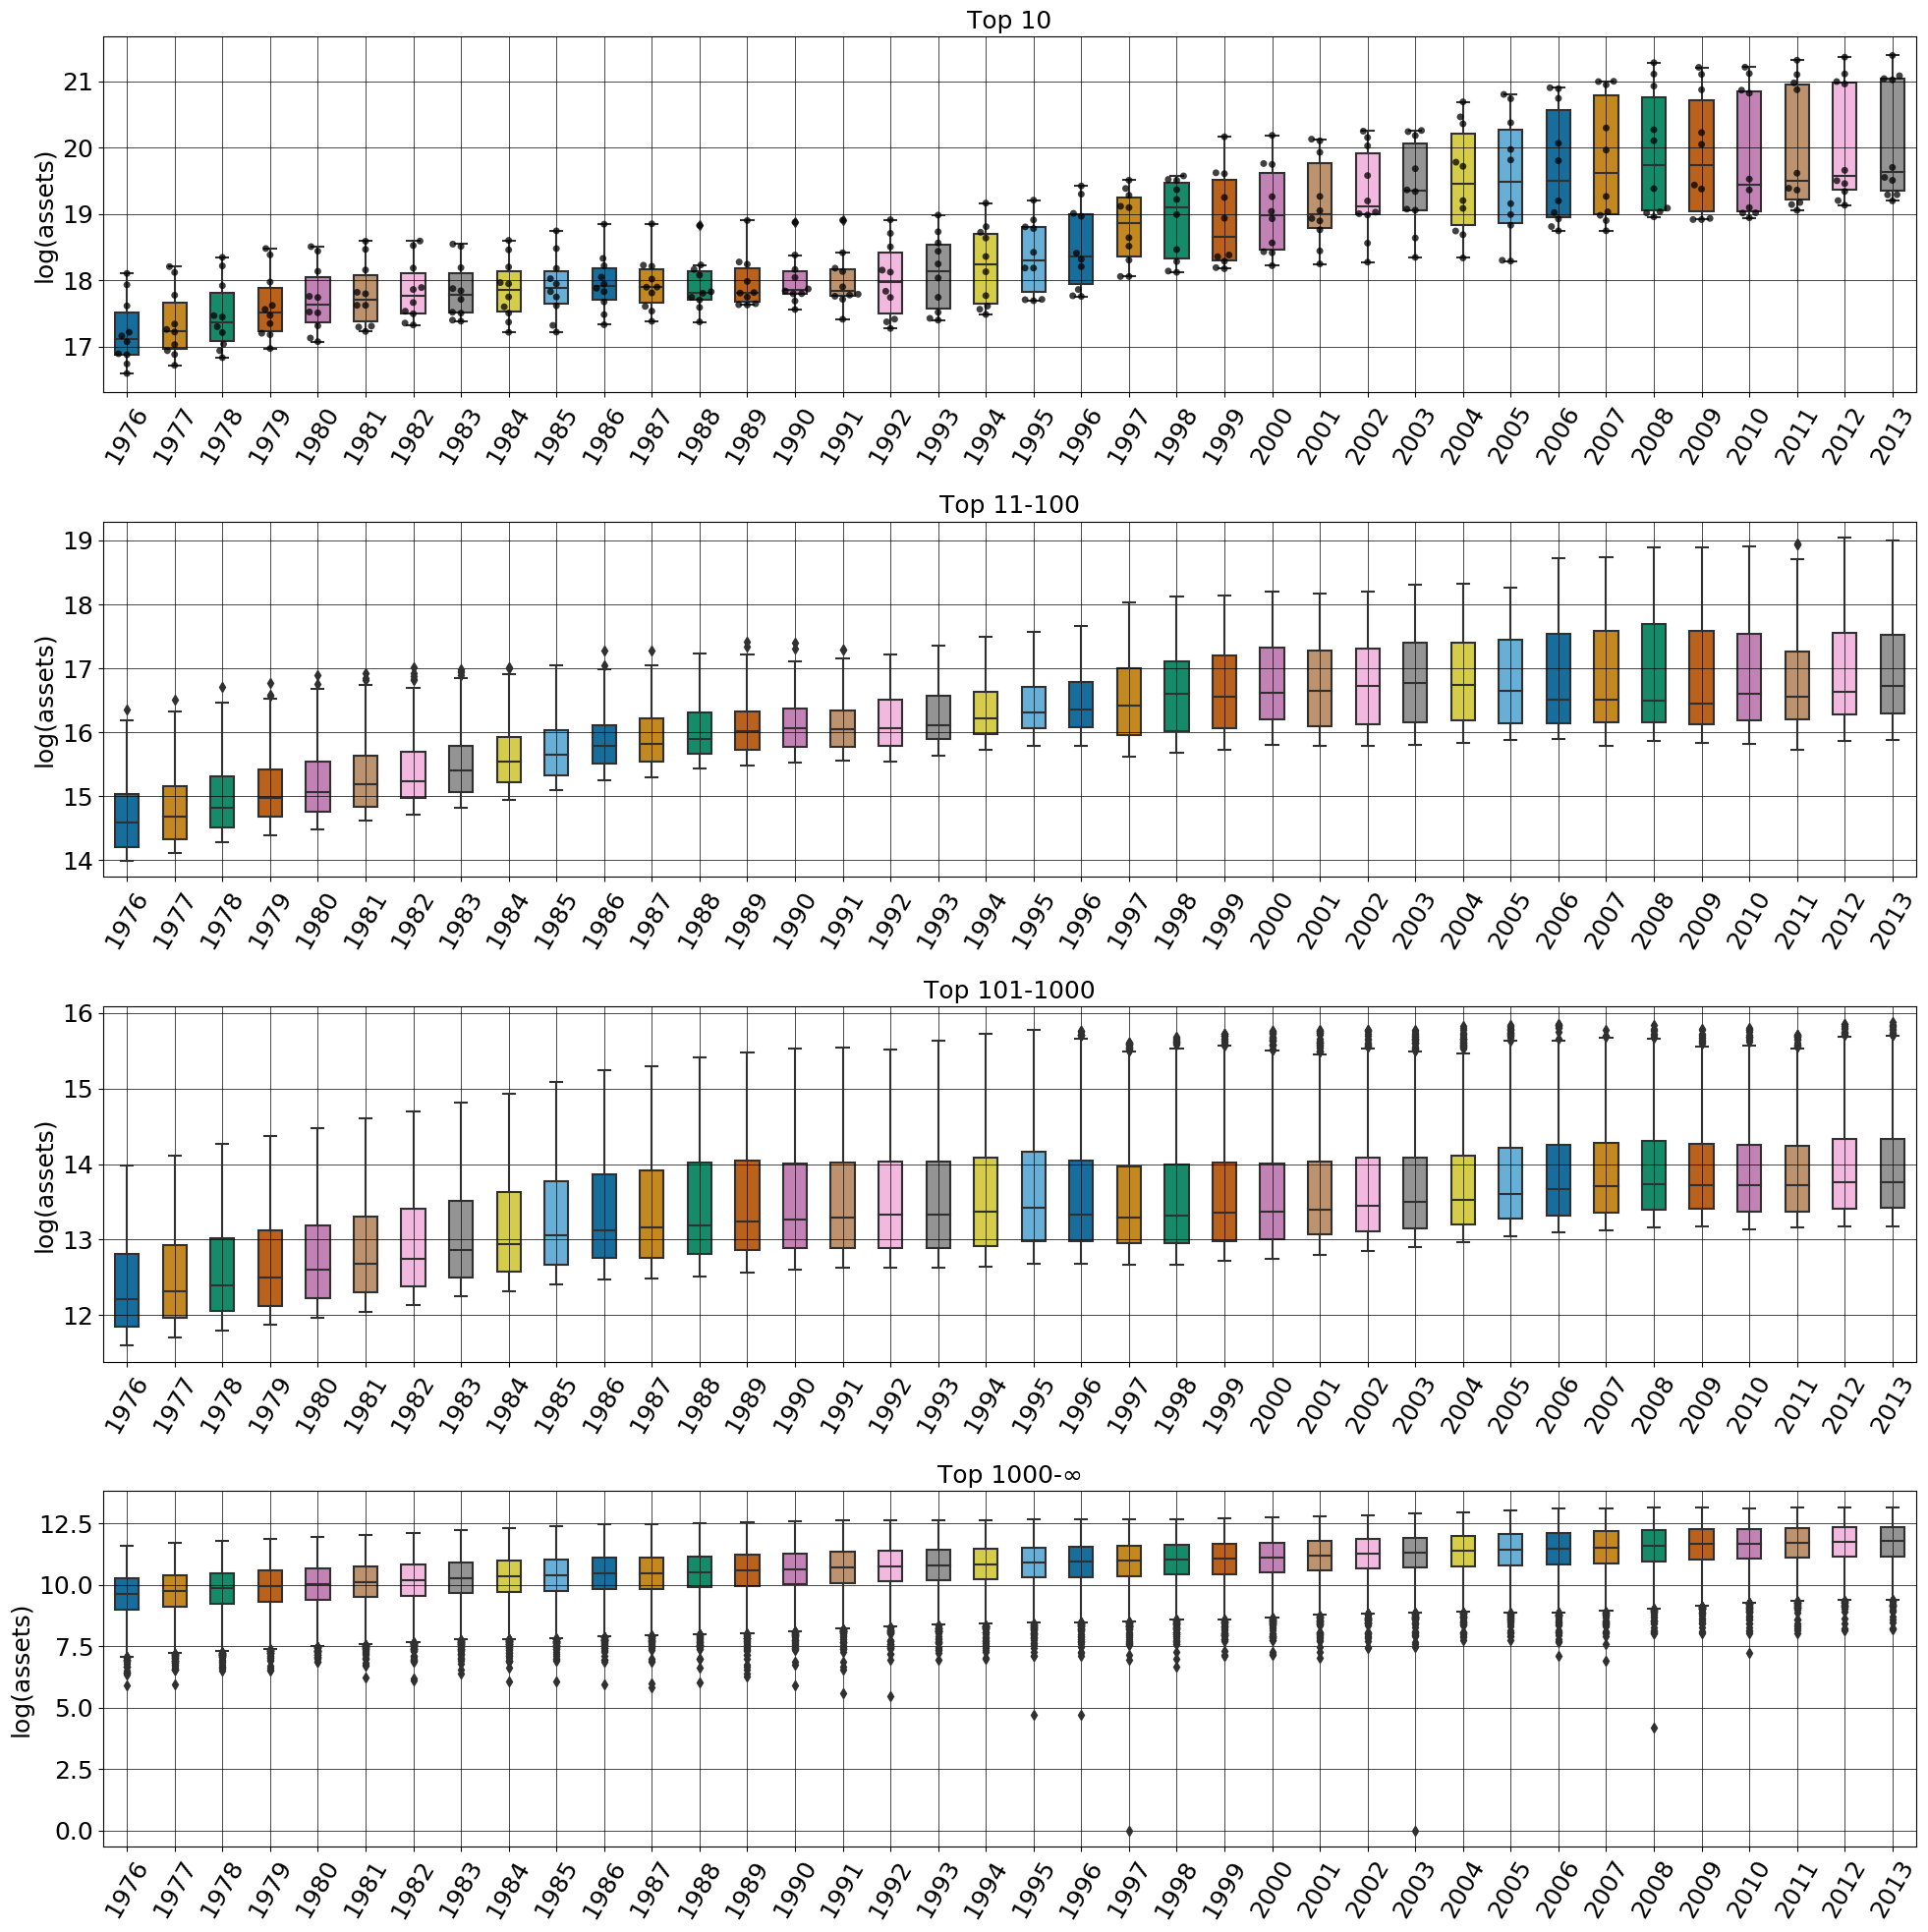

In [258]:
import matplotlib.dates as mdates

fig, ax = plt.subplots(4,1,figsize=(20,20))
axes = ax.ravel()


# plot boxplot with seaborn
for i in range(4):
    bplot=sns.boxplot(ax=ax[i],x=array_cat_group_4[i].date, 
                      y=np.log(array_cat_group_4[i].assets),
                 width=0.5,
                 palette="colorblind")
    if (i < 1):
        bplot=sns.swarmplot(ax=ax[i], y=np.log(array_cat_group_4[i].assets), x=array_cat_group_4[i].date,
             
              color='black',
              alpha=0.75)
    ax[i].tick_params(axis="x", labelrotation=60)
    ax[i].set_ylabel("log(assets)")
    ax[i].set_xlabel("")
    ax[i].set_title(categories[i])
    ax[i].set_xticks(range(0,38))
    ax[i].set_xticklabels(years, rotation=60)
    #ax[i].xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
    #formatter = ticker.FormatStrFormatter(">%y<")
    #ax[i].xaxis.set_major_formatter(formatter)  
    ax[i].grid()

save("boxplots_eachCategory")

Growth rates

In [259]:
array_cats_asset_yearly = []

#Compute growth rates
for cat in array_cats_asset:
    df_temp = cat.resample("Y").last()
    df_temp["pct_change"] = df_temp.assets.pct_change()
    array_cats_asset_yearly.append(df_temp)


Plot assets by cat

Text(0, 0.5, 'log(assets)')

Text(0, 0.5, 'Growth per year')

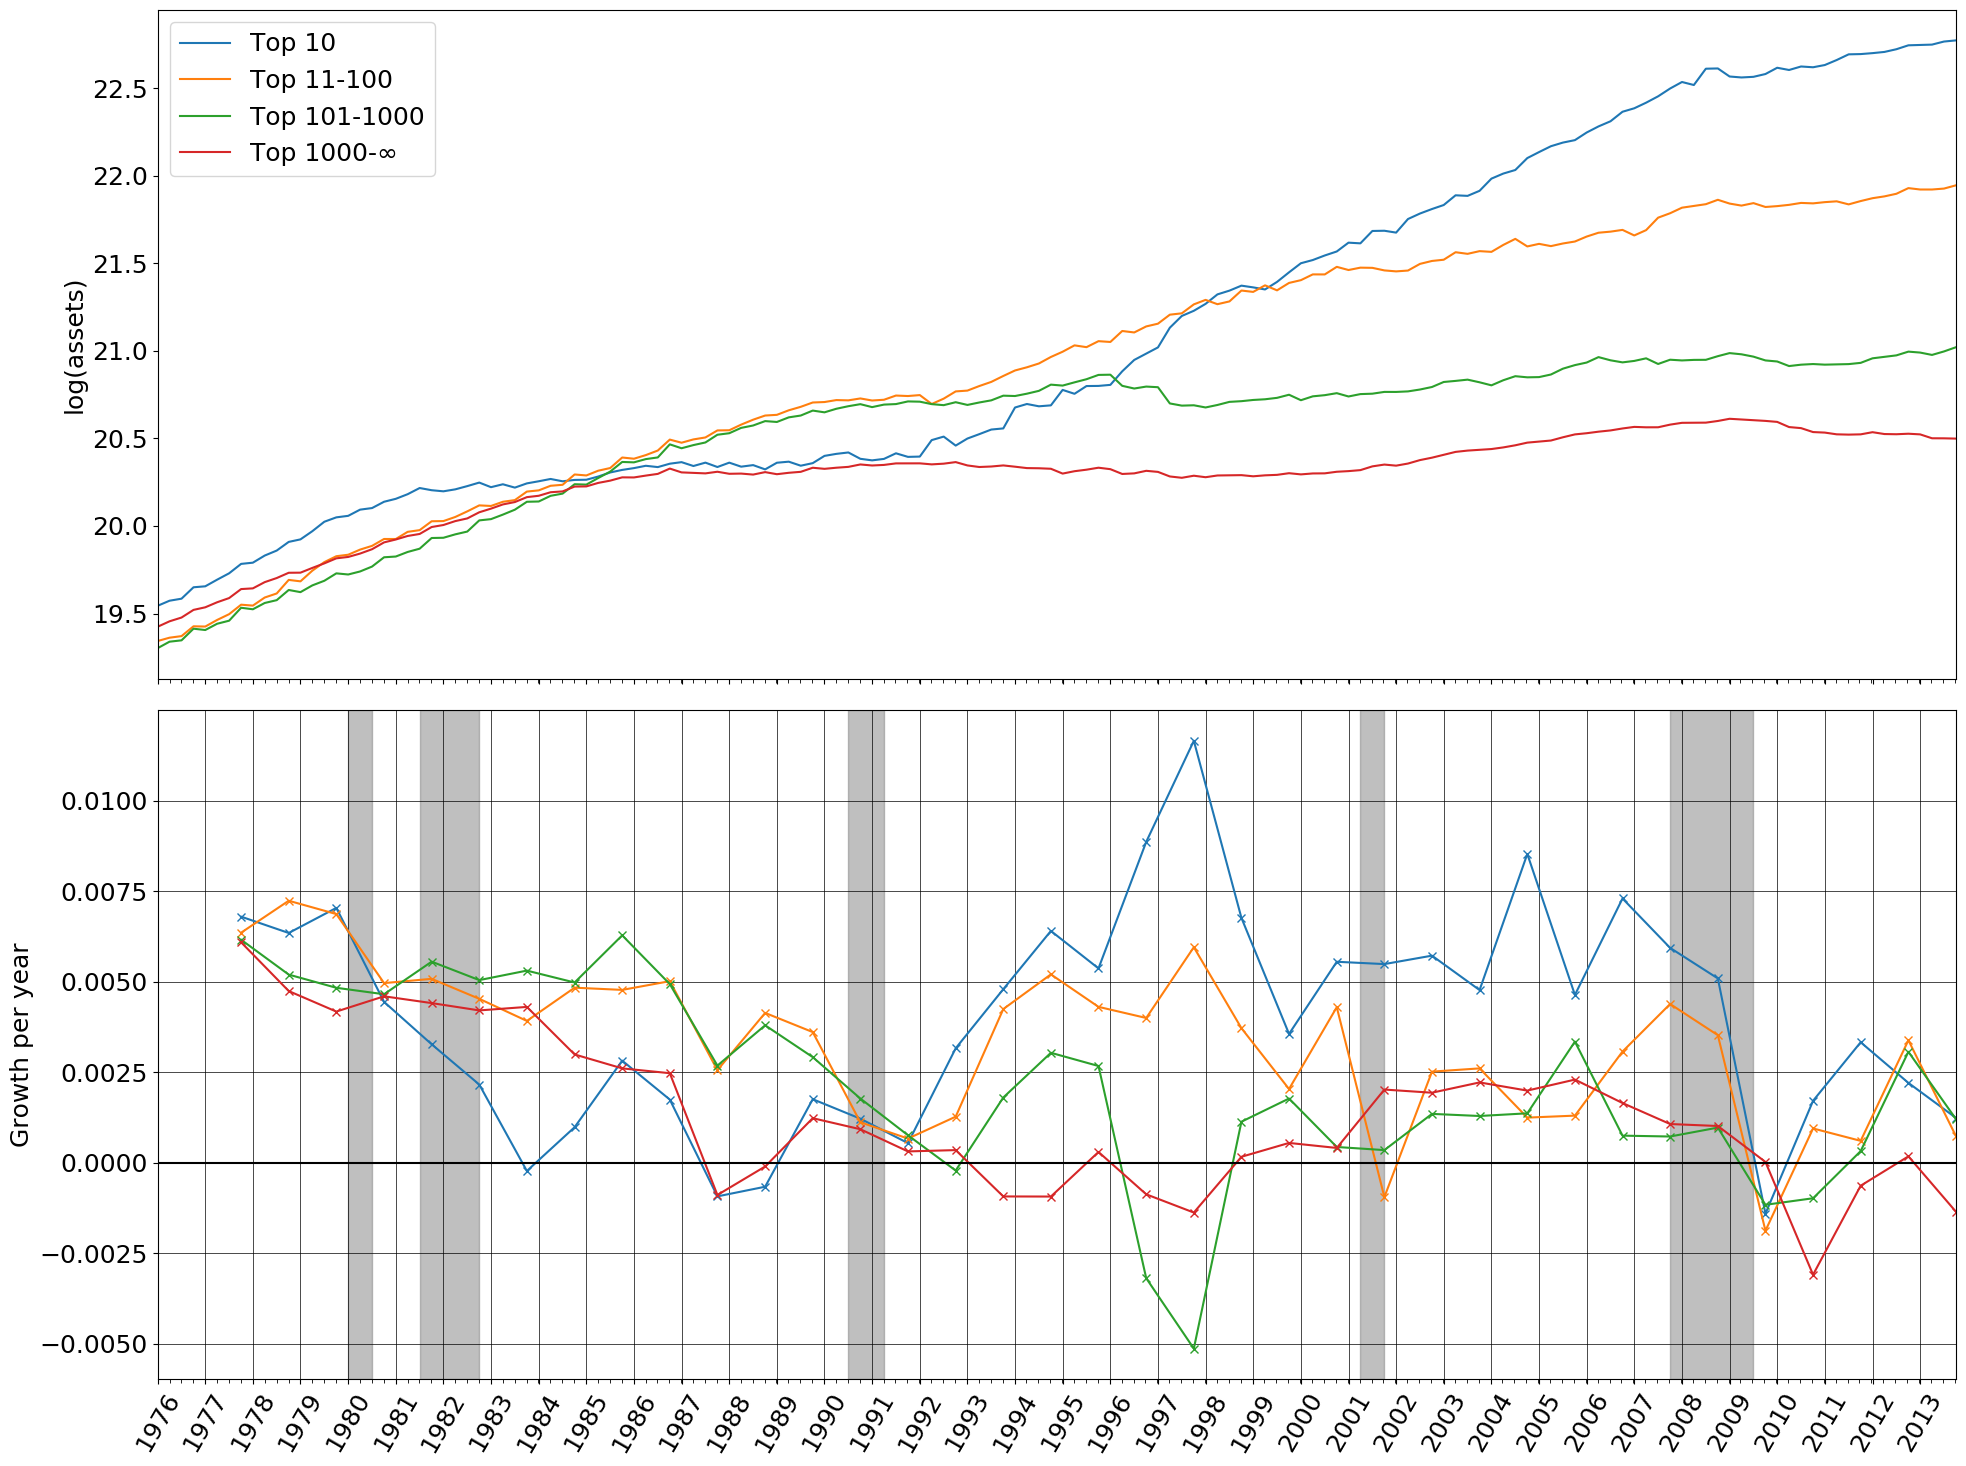

In [260]:
fig, ax = plt.subplots(2,1,figsize=(20,15), sharex=True)
ax = ax.ravel()

palette = itertools.cycle(sns.color_palette())

#Plot 1
for cat in array_cats_asset:
    ax[0].plot(cat.assets, color=next(palette))

    
catlegend(ax[0])
ax[0].set_ylabel("log(assets)")
#axsetting(ax[0])

palette = itertools.cycle(sns.color_palette())

#Plot 2
for cat in array_cats_asset_yearly:
    c = next(palette)
    ax[1].plot(cat["pct_change"] ,color=c)
    ax[1].plot(cat["pct_change"] ,"x", color=c)
    
ax[1].axhline(0, color="black")
axsetting(ax[1])


ax[1].set_ylabel("Growth per year")


#save
plt.tight_layout()
plt.savefig('LatexVorlage/graphs/DescriptiveStats/BanksByAssetCategory_assetsbycat_7613.png')

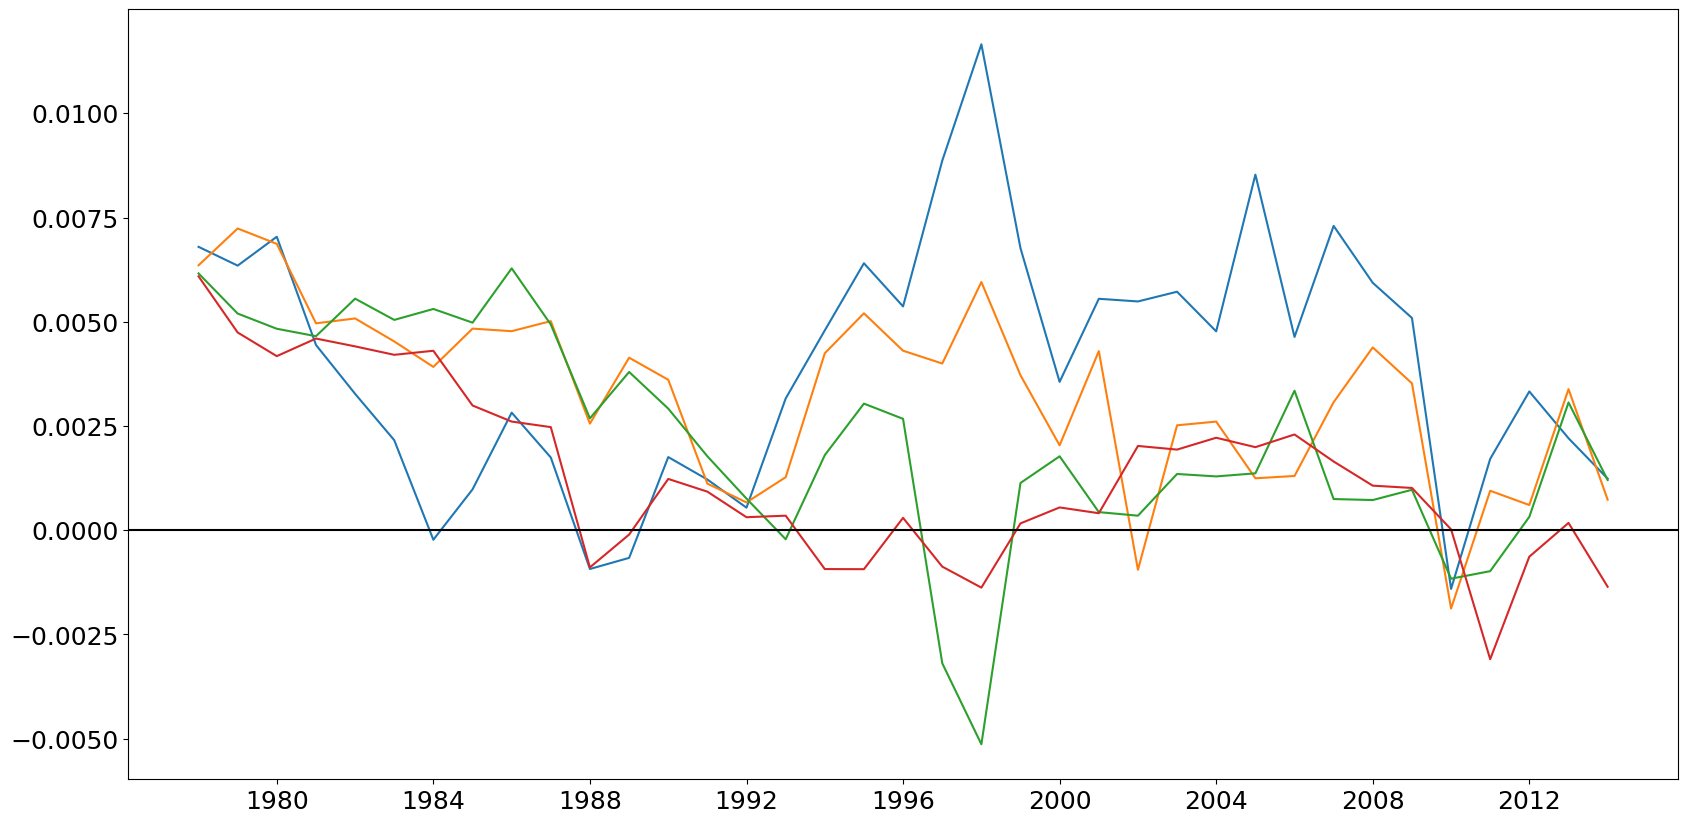

In [261]:
fig, ax = plt.subplots(figsize=figsize_OneGraph)

for cat in array_cats_asset_yearly:
    ax.plot(cat["pct_change"])
    
ax.axhline(0, color="black")

Cyclical assets

In [262]:
df_assets_cycle = pd.DataFrame()

#Compute cycle for cat
cycle, trend = sm.tsa.filters.hpfilter(df_agg_cat1_log.assets, 1600)
df_assets_cycle["cat1_assets"] = cycle
cycle, trend = sm.tsa.filters.hpfilter(df_agg_cat2_log.assets, 1600)
df_assets_cycle["cat2_assets"] = cycle
cycle, trend = sm.tsa.filters.hpfilter(df_agg_cat3_log.assets, 1600)
df_assets_cycle["cat3_assets"] = cycle
cycle, trend = sm.tsa.filters.hpfilter(df_agg_cat4_log.assets, 1600)
df_assets_cycle["cat4_assets"] = cycle


Standard Deviations

In [263]:
stds = df_assets_cycle.std().round(3)

stds

cat1_assets   3.100e-02
cat2_assets   2.500e-02
cat3_assets   2.500e-02
cat4_assets   1.300e-02
dtype: float64

Text(0.5, 1.0, 'Top 10')

Text(0.5, 1.0, 'Large banks')

Text(0.5, 1.0, 'Medium banks')

Text(0.5, 1.0, 'Small banks')

Text(0.01, 0.8, 'std:0.031')

Text(0.01, 0.8, 'std:0.025')

Text(0.01, 0.8, 'std:0.025')

Text(0.01, 0.8, 'std:0.013')

(721444.0, 735233.0)

(-9.550102975876769, 10.480691378183167)

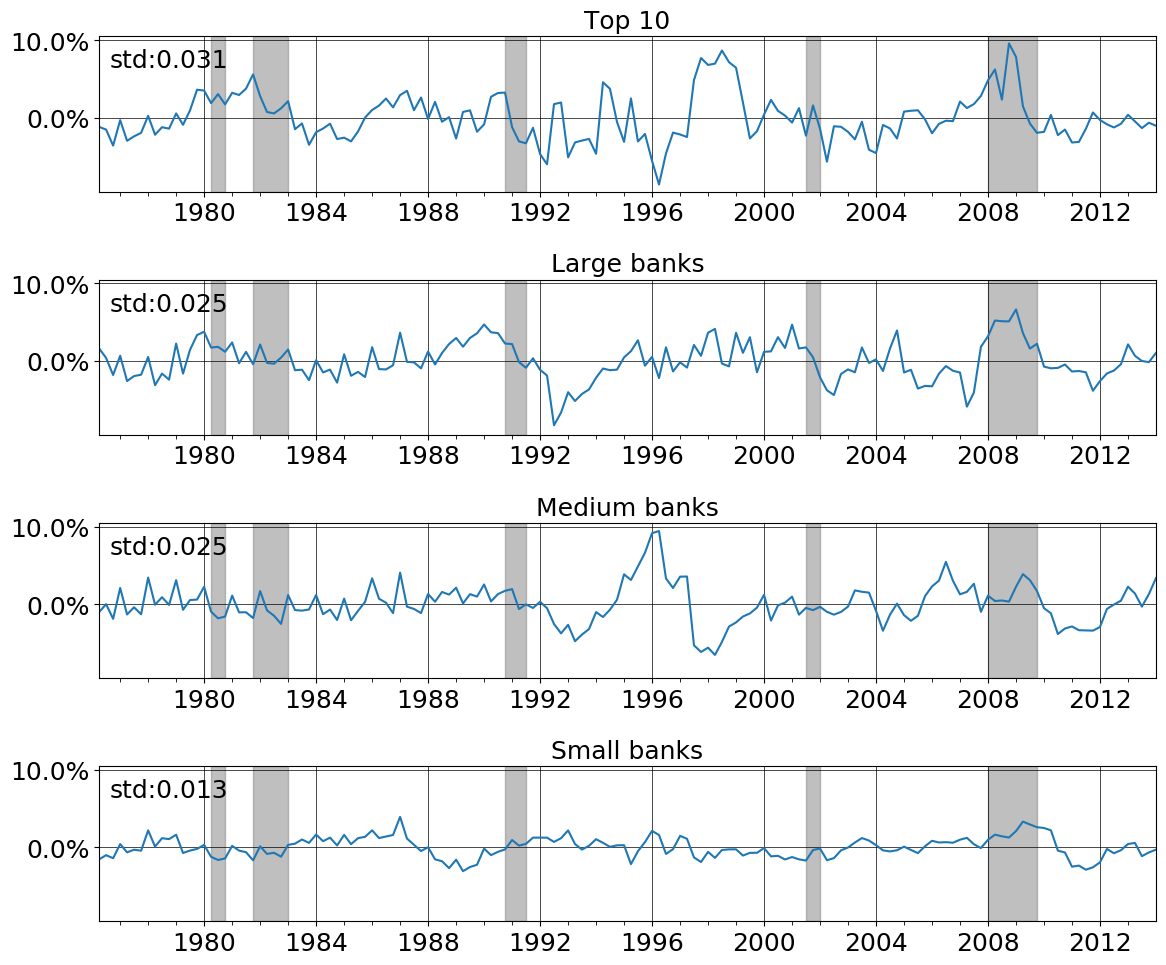

In [264]:
fig, ax = plt.subplots(4,1,figsize=(12,10), sharey=True )
ax = ax.ravel()



ax[0].set_title("Top 10")
ax[1].set_title("Large banks")
ax[2].set_title("Medium banks")
ax[3].set_title("Small banks")

axsetting2(ax[0])
axsetting2(ax[1])
axsetting2(ax[2])
axsetting2(ax[3])

ax[0].yaxis.set_major_formatter(ticker.PercentFormatter())
ax[1].yaxis.set_major_formatter(ticker.PercentFormatter())
ax[2].yaxis.set_major_formatter(ticker.PercentFormatter())
ax[3].yaxis.set_major_formatter(ticker.PercentFormatter())


ax[0].plot(df_assets_cycle.cat1_assets*100)
ax[1].plot(df_assets_cycle.cat2_assets*100)
ax[2].plot(df_assets_cycle.cat3_assets*100)
ax[3].plot(df_assets_cycle.cat4_assets*100)

for i in range(4):
    ax[i].text(0.01,0.8,"std:" + str(stds.iloc[i]), transform=ax[i].transAxes)


save("catAssetsCycle")

ax[0].get_xlim()

ax[0].get_ylim()

Table cyclical numbers for crisis 2007/8

In [303]:
temp = df_assets_cycle[(df_assets_cycle.index>=("2006-12-31")) & 
                (df_assets_cycle.index<=("2011-12-31"))]

temp = temp *100
temp.to_latex("LatexVorlage/graphs/Tables/LatexTables/cyclicalAssetsByCat_Crisis.tex")

temp

cat1_assets  cat2_assets  cat3_assets  cat4_assets
date                                                          
2006-12-31          2.1         -1.5          1.3         0.98
2007-03-31          1.2         -5.9          1.6          1.2
2007-06-30          1.7         -4.1          2.6          0.4
2007-09-30          2.8          1.8         -1.0         -0.1
2007-12-31          4.8          3.2          1.1         0.97
2008-03-31          6.2          5.2         0.39          1.6
2008-06-30          2.3          5.1         0.46          1.4
2008-09-30          9.6          5.1         0.31          1.3
2008-12-31          7.8          6.6          2.2          2.1
2009-03-31          1.4          3.6          3.9          3.3
2009-06-30        -0.77          1.6          3.1          2.9
2009-09-30         -2.0          2.2          1.7          2.6
2009-12-31         -1.8        -0.75        -0.54          2.5
2010-03-31         0.34        -0.97         -1.2          2.2
2010-06-30         -2.3        -0.92         -3.9        -0.43
2010-09-30         -1.5        -0.48         -3.2        -0.67
2010-12-31         -3.2         -1.4         -2.9         -2.5
2011-03-31         -3.1         -1.3         -3.4         -2.4
2011-06-30         -1.5         -1.5         -3.4         -2.9
2011-09-30         0.65         -3.9         -3.4         -2.6
2011-12-31        -0.32         -2.6         -3.0         -1.9

Clean datasets for cyclical for other positions

In [266]:
#fix foreign deposits per category dataset


#fix...


In [267]:
def compute_cycle_trading(cat, column):
    #remove zeros
    temp_series = cat[column]
    temp_series.dropna(inplace=True)
    #comput cycle
    cycle, trend = sm.tsa.filters.hpfilter(temp_series, 1600)
    #insert zeros back into cycle
    count_missing_values = 152 - cycle.size
    zeros = pd.Series(np.zeros(count_missing_values))
    cycle = pd.concat([zeros, cycle])
    return cycle

Compute cyclical for each position

In [268]:
df_cycles = pd.DataFrame()
cat_counter = 1

for cat in array_cats:
    cat_columns = list(cat.iloc[:, 2:])
    for column in cat_columns:
        if (column.startswith("trading")):
            cycle = compute_cycle_trading(cat, column)
            df_cycles["cat" + str(cat_counter) + "_" + column] = cycle
        else:
            cycle, trend = sm.tsa.filters.hpfilter(cat[column], 1600)
            df_cycles["cat" + str(cat_counter) + "_" + column] = cycle
    cat_counter = cat_counter % 4
    cat_counter = cat_counter + 1    
        
        
cycle, trend = sm.tsa.filters.hpfilter(df_agg_cat1_log.assets, 1600)
df_assets_cycle["cat1_assets"] = cycle
cycle, trend = sm.tsa.filters.hpfilter(df_agg_cat2_log.assets, 1600)
df_assets_cycle["cat2_assets"] = cycle
cycle, trend = sm.tsa.filters.hpfilter(df_agg_cat3_log.assets, 1600)
df_assets_cycle["cat3_assets"] = cycle
cycle, trend = sm.tsa.filters.hpfilter(df_agg_cat4_log.assets, 1600)
df_assets_cycle["cat4_assets"] = cycle

In [269]:
df_agg_cat1_log.columns.values

array(['year', 'quarter', 'assets', 'cash', 'fedfundsrepoasset',
       'securities', 'loansnet', 'tradingassets', 'otherassets'],
      dtype=object)

Correlation between categories

Functions

In [270]:
def calculate_pvalues(df):
    df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            pvalues[r][c] = round(pearsonr(df[r], df[c])[1], 4)
    pvalues = pvalues.astype("float")
    return pvalues

In [271]:
#apply color to significant values
def color_sig(val):
    
    color = 'royalblue' if val[-3:] == "***" else 'default'
    
    return 'background-color: %s' % color

In [272]:
df_agg_cat1_log.columns.values

array(['year', 'quarter', 'assets', 'cash', 'fedfundsrepoasset',
       'securities', 'loansnet', 'tradingassets', 'otherassets'],
      dtype=object)

In [273]:
pd.options.display.float_format = '{:.2}'.format

columns = df_agg_cat1_log.columns.values[0] 
temp_df = df_cycles.filter(like="_" + columns, axis=1)
pval = calculate_pvalues(temp_df)
temp_df_corr = temp_df.corr()
temp_df_corr = temp_df_corr.round(2)
#create three masks
r1 = temp_df_corr.applymap(lambda x: '{}*'.format(x))
r2 = temp_df_corr.applymap(lambda x: '{}**'.format(x))
r3 = temp_df_corr.applymap(lambda x: '{}***'.format(x))
    
# apply them where appropriate
temp_df_corr = temp_df_corr.mask(pval<=0.1,r1)
temp_df_corr = temp_df_corr.mask(pval<=0.05,r2)
temp_df_corr = temp_df_corr.mask(pval<=0.01,r3)
    
temp_df_corr = temp_df_corr.astype("str")

temp_df_corr.style.applymap(color_sig)
    

In [311]:
pd.options.display.float_format = '{:.2}'.format

for columns in df_agg_cat1_log.columns.values:
    temp_df = df_cycles.filter(like="_" + columns, axis=1)
    pval = calculate_pvalues(temp_df)
    temp_df_corr = temp_df.corr()
    temp_df_corr = temp_df_corr.round(2)
    #create three masks
    r1 = temp_df_corr.applymap(lambda x: '{}*'.format(x))
    r2 = temp_df_corr.applymap(lambda x: '{}**'.format(x))
    r3 = temp_df_corr.applymap(lambda x: '{}***'.format(x))
    
    # apply them where appropriate
    temp_df_corr = temp_df_corr.mask(pval<=0.1,r1)
    temp_df_corr = temp_df_corr.mask(pval<=0.05,r2)
    temp_df_corr = temp_df_corr.mask(pval<=0.01,r3)
    
    temp_df_corr = temp_df_corr.astype("str")
    
    print(columns)
    
    if ( (str(columns) != "year") & (str(columns) != "quarter")):
        temp_df_corr.to_latex("LatexVorlage/graphs/Tables/LatexTables/cat_" + str(columns) + "_cycle_corr.tex")

    temp_df_corr.style.applymap(color_sig)
    
    

year


quarter


assets


FileNotFoundError: [Errno 2] No such file or directory: 'graphs/Tables/LatexTables/cat_assets_cycle_corr.tex'

Further look into correlation between cat1 and cat3

In [275]:
#choose my categories
temp_df_cycles = df_cycles.copy()

#datetimes to drop
start_remove = pd.to_datetime('1996-03-31')
end_remove = pd.to_datetime('1999-12-31')
temp_df_cycles = temp_df_cycles.loc[(temp_df_cycles.index < start_remove) | (temp_df_cycles.index > end_remove)]

temp_df_cycles["cat1_assets"].corr(temp_df_cycles["cat3_assets"])

df_cycles["cat1_assets"].corr(df_cycles["cat3_assets"])

0.052664433559044065

-0.2673416437939859

Compute correlation per position

Assets

In [276]:
df_cycles

cat1_assets  cat1_cash  cat1_fedfundsrepoasset  cat1_securities  cat1_loansnet  cat1_tradingassets  cat1_otherassets  cat2_assets  cat2_cash  cat2_fedfundsrepoasset  cat2_securities  cat2_loansnet  cat2_tradingassets  cat2_otherassets  cat3_assets  cat3_cash  cat3_fedfundsrepoasset  cat3_securities  cat3_loansnet  cat3_tradingassets  cat3_otherassets  cat4_assets  cat4_cash  cat4_fedfundsrepoasset  cat4_securities  cat4_loansnet  cat4_tradingassets  cat4_otherassets  cat1_equity  cat1_fedfundsrepoliab  cat1_deposits  cat1_foreigndep  cat1_otherborrowedmoney  cat1_tradingliabilities  cat1_subordinateddebt  cat1_otherliab  cat2_equity  cat2_fedfundsrepoliab  cat2_deposits  cat2_foreigndep  cat2_otherborrowedmoney  cat2_tradingliabilities  cat2_subordinateddebt  cat2_otherliab  cat3_equity  cat3_fedfundsrepoliab  cat3_deposits  cat3_foreigndep  cat3_otherborrowedmoney  cat3_tradingliabilities  cat3_subordinateddebt  cat3_otherliab  cat4_equity  cat4_fedfundsrepoliab  \
date                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            
1976-03-31       -0.012     -0.055                   -0.43           -0.048           0.01                 nan             0.022        0.016    -0.0011                  -0.034           -0.014          0.028                 nan             0.049        -0.01       0.02                   0.058            -0.02         -0.023                 nan             0.031       -0.016    -0.0031                    0.18            0.022         -0.061                 nan              0.04       -0.012                  -0.11          0.016           -0.041                   -0.092                      nan                  -0.15           0.043         0.02                 -0.047         0.0082            0.042                    0.098                      nan                 0.0022           0.097        0.011                 0.0054         -0.016           -0.009                    -0.16                      nan                  -0.11         -0.0039      -0.0023                 -0.075   
1976-06-30       -0.016     -0.067                  -0.083           -0.043        -0.0049                 nan             0.067       0.0038     0.0077                    -0.1           -0.034          0.017                 nan             0.019     -0.00015      0.032                  -0.027            0.023          -0.02                 nan             0.022        -0.01     0.0094                  -0.032             0.03         -0.039                 nan             0.038      -0.0018                  -0.14          0.014           -0.052                   -0.084                      nan                  0.028            0.12        0.012                 -0.064         0.0061           0.0029                    0.037                      nan                  0.022            0.04        0.011                  0.017        -0.0071             -0.1                     0.29                      nan                 -0.023            0.12       0.0034                    0.1   
1976-09-30       -0.036       -0.1      

In [277]:
df_cycles_assets = df_cycles.filter(like="_" + "assets", axis=1)

df_cycles_assets

cat1_assets  cat2_assets  cat3_assets  cat4_assets
date                                                          
1976-03-31       -0.012        0.016        -0.01       -0.016
1976-06-30       -0.016       0.0038     -0.00015        -0.01
1976-09-30       -0.036       -0.018       -0.019       -0.014
1976-12-31      -0.0033       0.0065        0.021       0.0041
1977-03-31        -0.03       -0.026       -0.013      -0.0065
1977-06-30       -0.024        -0.02      -0.0042      -0.0031
1977-09-30        -0.02       -0.018       -0.013      -0.0044
1977-12-31       0.0023       0.0049        0.034        0.022
1978-03-31       -0.022       -0.032     -0.00088      0.00091
1978-06-30       -0.012       -0.017       0.0088        0.012
1978-09-30       -0.014       -0.024      -0.0012        0.011
1978-12-31       0.0053        0.022        0.031        0.016
1979-03-31      -0.0094       -0.017      -0.0075      -0.0074
1979-06-30       0.0092        0.014       0.0051      -0.0043
1979-09-30        0.036        0.033       0.0057      -0.0021
1979-12-31        0.035        0.037        0.022       0.0031
1980-03-31        0.019        0.017      -0.0099       -0.012
1980-06-30         0.03        0.018       -0.018       -0.016
1980-09-30        0.017        0.012       -0.016       -0.014
1980-12-31        0.032        0.024        0.011       0.0018
1981-03-31        0.029      -0.0032       -0.011      -0.0043
1981-06-30        0.037        0.012       -0.011      -0.0063
1981-09-30        0.056      -0.0044       -0.018       -0.017
1981-12-31        0.028        0.021        0.017       0.0013
1982-03-31       0.0071      -0.0028      -0.0082      -0.0086
1982-06-30       0.0053      -0.0038       -0.015       -0.007
1982-09-30        0.012       0.0041       -0.026       -0.012
1982-12-31        0.021        0.015        0.012       0.0031
1983-03-31       -0.015       -0.012      -0.0078       0.0047
1983-06-30      -0.0077       -0.012      -0.0085         0.01
1983-09-30       -0.035       -0.025       -0.007       0.0057
1983-12-31       -0.019      0.00078        0.012        0.016
1984-03-31       -0.014       -0.015       -0.013       0.0079
1984-06-30      -0.0079       -0.011      -0.0071        0.012
1984-09-30       -0.028       -0.028       -0.021       0.0024
1984-12-31       -0.026       0.0084        0.007        0.016
1985-03-31       -0.031       -0.019       -0.021        0.004
1985-06-30       -0.018       -0.014      -0.0088        0.012
1985-09-30     -1.4e-05       -0.021       0.0028        0.013
1985-12-31       0.0097        0.018        0.033        0.022
1986-03-31        0.015       -0.011       0.0068        0.012
1986-06-30        0.025       -0.011       0.0018        0.014
1986-09-30        0.013      -0.0058       -0.012        0.016
1986-12-31        0.029        0.036        0.041        0.039
1987-03-31        0.035      -0.0014      -0.0034        0.011
1987-06-30       0.0094       -0.002      -0.0063       0.0032
1987-09-30        0.026      -0.0098       -0.012      -0.0049
1987-12-31      -0.0019        0.012        0.013      7.3e-05
1988-03-31         0.02      -0.0048        0.003       -0.016
1988-06-30      -0.0054         0.01        0.016       -0.018
1988-09-30      0.00046        0.022        0.012       -0.027
1988-12-31       -0.027        0.029        0.021       -0.016
1989-03-31       0.0072        0.018      0.00084       -0.031
1989-06-30       0.0093        0.029        0.013       -0.026
1989-09-30       -0.018        0.036       0.0096       -0.023
1989-12-31      -0.0088        0.047        0.025      -0.0017
1990-03-31        0.027        0.037       0.0034        -0.01
1990-06-30        0.032        0.036        0.013      -0.0058
1990-09-30        0.032        0.022        0.017      -0.0028
1990-12-31       -0.012        0.022        0.019       0.0094
1991-03-31       -0.031      -0.0017      -0.0065       0.0022
1991-06-30       -0.033       -0.009     -0

Cross-Autocorrelations

In [278]:
def crosscorr(datax, datay, lag=0):
    return datax.corr(datay.shift(lag))

In [279]:
temp_df = pd.DataFrame()
for column1 in df_cycles_assets:
    for column2 in df_cycles_assets:
        temp_array = []
        for i in range(10):
            temp_array.append(crosscorr(df_assets_cycle[column1], df_assets_cycle[column2], i))
        temp_df[column1 + "+" + column2] = temp_array
        
temp_df.index.rename("lag", inplace=True)

for i in range(0,16,4):
    temp_df.iloc[:,i:i+4]
    


cat1_assets+cat1_assets  cat1_assets+cat2_assets  cat1_assets+cat3_assets  cat1_assets+cat4_assets
lag                                                                                                    
0                        1.0                     0.41                    -0.27                   -0.069
1                       0.66                     0.34                    -0.26                   -0.088
2                       0.44                     0.27                    -0.18                   -0.032
3                       0.36                     0.18                    -0.11                   -0.007
4                       0.26                    0.079                   -0.084                   -0.029
5                      0.055                   -0.057                    0.044                   0.0053
6                     -0.029                    -0.14                      0.2                     0.12
7                      -0.11                    -0.19                     0.32                     0.18
8                      -0.18                    -0.17                     0.36                     0.14
9                      -0.21                    -0.11                     0.36                     0.12

cat2_assets+cat1_assets  cat2_assets+cat2_assets  cat2_assets+cat3_assets  cat2_assets+cat4_assets
lag                                                                                                    
0                       0.41                      1.0                     0.24                   -0.046
1                       0.43                     0.63                     0.11                    -0.19
2                        0.4                     0.53                     0.12                    -0.14
3                       0.33                     0.32                    0.075                    -0.16
4                       0.31                      0.3                     0.21                   -0.016
5                       0.25                    0.071                    0.084                    -0.15
6                       0.18                 -0.00094                     0.12                   -0.089
7                      0.074                    -0.13                     0.11                   -0.063
8                      0.019                    -0.12                      0.2                    0.068
9                      0.019                     -0.3                     0.04                   -0.033

cat3_assets+cat1_assets  cat3_assets+cat2_assets  cat3_assets+cat3_assets  cat3_assets+cat4_assets
lag                                                                                                    
0                      -0.27                     0.24                      1.0                     0.41
1                      -0.14                     0.12                     0.68                     0.14
2                      -0.04                     0.14                     0.53                    0.025
3                     -0.026                    0.047                     0.35                    -0.09
4                      0.048                      0.1                     0.34                  -0.0024
5                      0.095                   -0.076                  -0.0006                    -0.17
6                       0.13                    -0.11                    -0.14                    -0.19
7                      0.061                    -0.19                    -0.31                    -0.23
8                      0.048                    -0.22                    -0.29                   -0.083
9                     -0.089                    -0.43                    -0.45                    -0.11

cat4_assets+cat1_assets  cat4_assets+cat2_assets  cat4_assets+cat3_assets  cat4_assets+cat4_assets
lag                                                                                                    
0                     -0.069                   -0.046                     0.41                      1.0
1                     0.0062                    -0.12                     0.22                     0.71
2                      0.036                   -0.054                      0.2                     0.55
3                     -0.033                   -0.083                     0.16                     0.39
4                    -0.0073                    0.019                     0.25                     0.42
5                      0.035                     -0.1                    0.051                     0.15
6                      0.055                   -0.067                   0.0012                    0.016
7                     -0.043                    -0.12                   -0.057                    -0.13
8                      -0.11                    -0.08                    0.054                   -0.063
9                       -0.2                    -0.22                   -0.058                    -0.22

Median banks per category

In [280]:
def get_cat(gr, cat):
    global df_cat1_banks
    global df_cat2_banks
    global df_cat3_banks
    global df_cat4_banks
    if cat == 1:
        return gr.iloc[:10,:]
    elif cat == 2:
        return gr.iloc[10:100,:]
    elif cat == 3:
        return gr.iloc[100:1000,:]
    elif cat == 4:
        return gr.iloc[1000:,:]

In [281]:
array_cat_median = [pd.Series(), pd.Series(), pd.Series(), pd.Series()]

grouped = df_assets.groupby(["date"])

for i in range(1,5):
    for name, gr in grouped:
        gr = gr.sort_values(by="assets", ascending=False)
        gr = get_cat(gr,i)
        #get median
        median = {name : gr.assets.median()}
        temp_s = pd.Series(median)
        #add to minmax dataframe
        array_cat_median[i-1] =  array_cat_median[i-1].append(temp_s)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


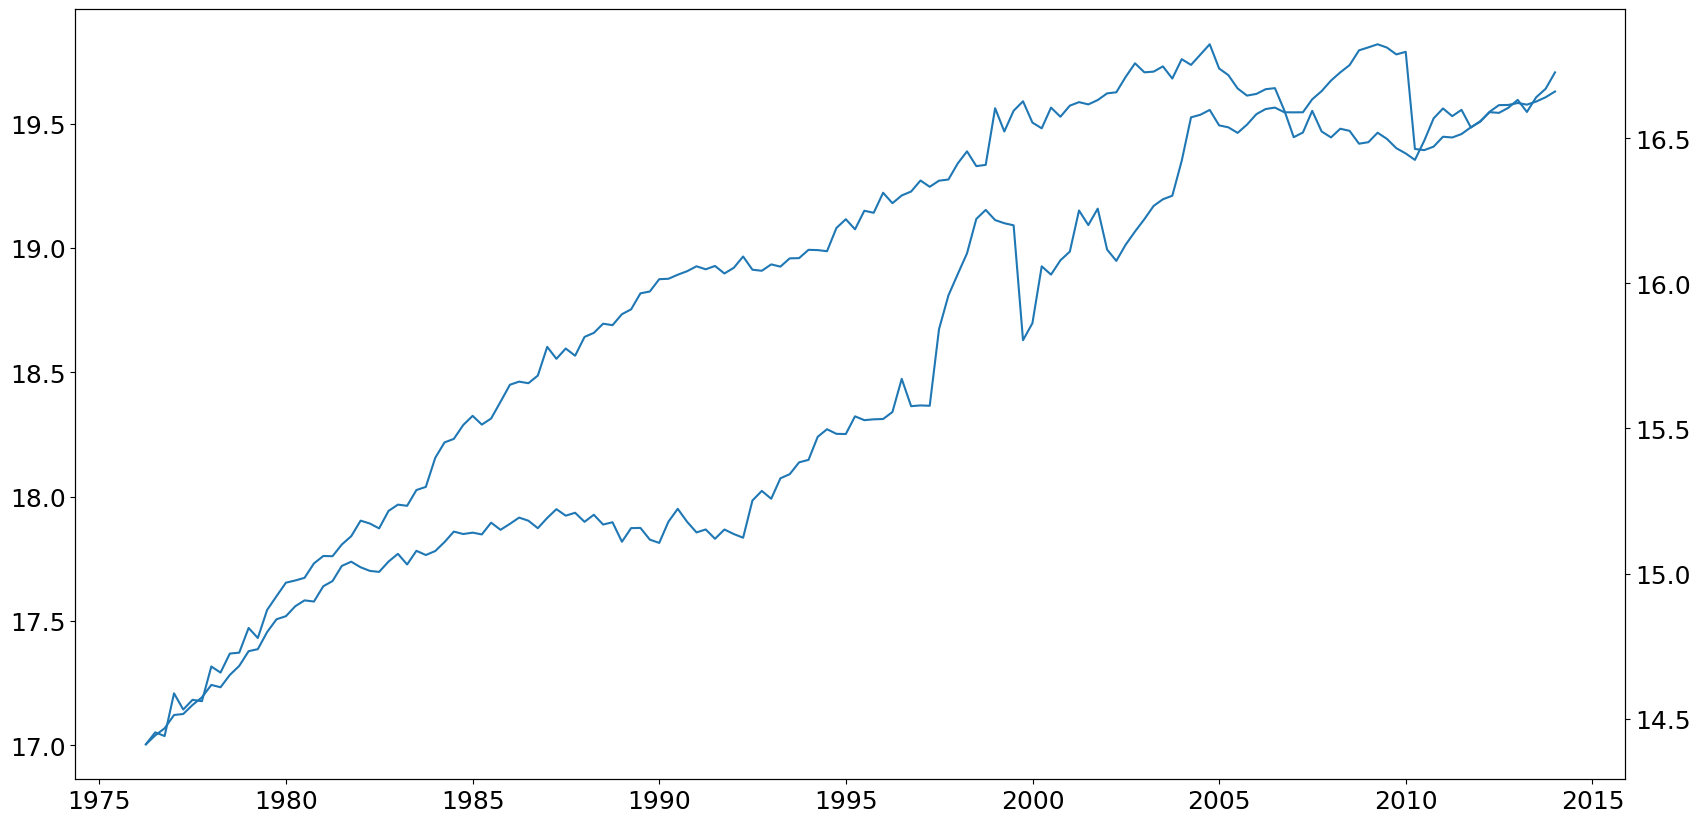

In [282]:
fig, ax = plt.subplots(figsize=figsize_OneGraph)

ax.plot(np.log(array_cat_median[0]))

ax1 = ax.twinx()

ax1.plot(np.log(array_cat_median[1]))

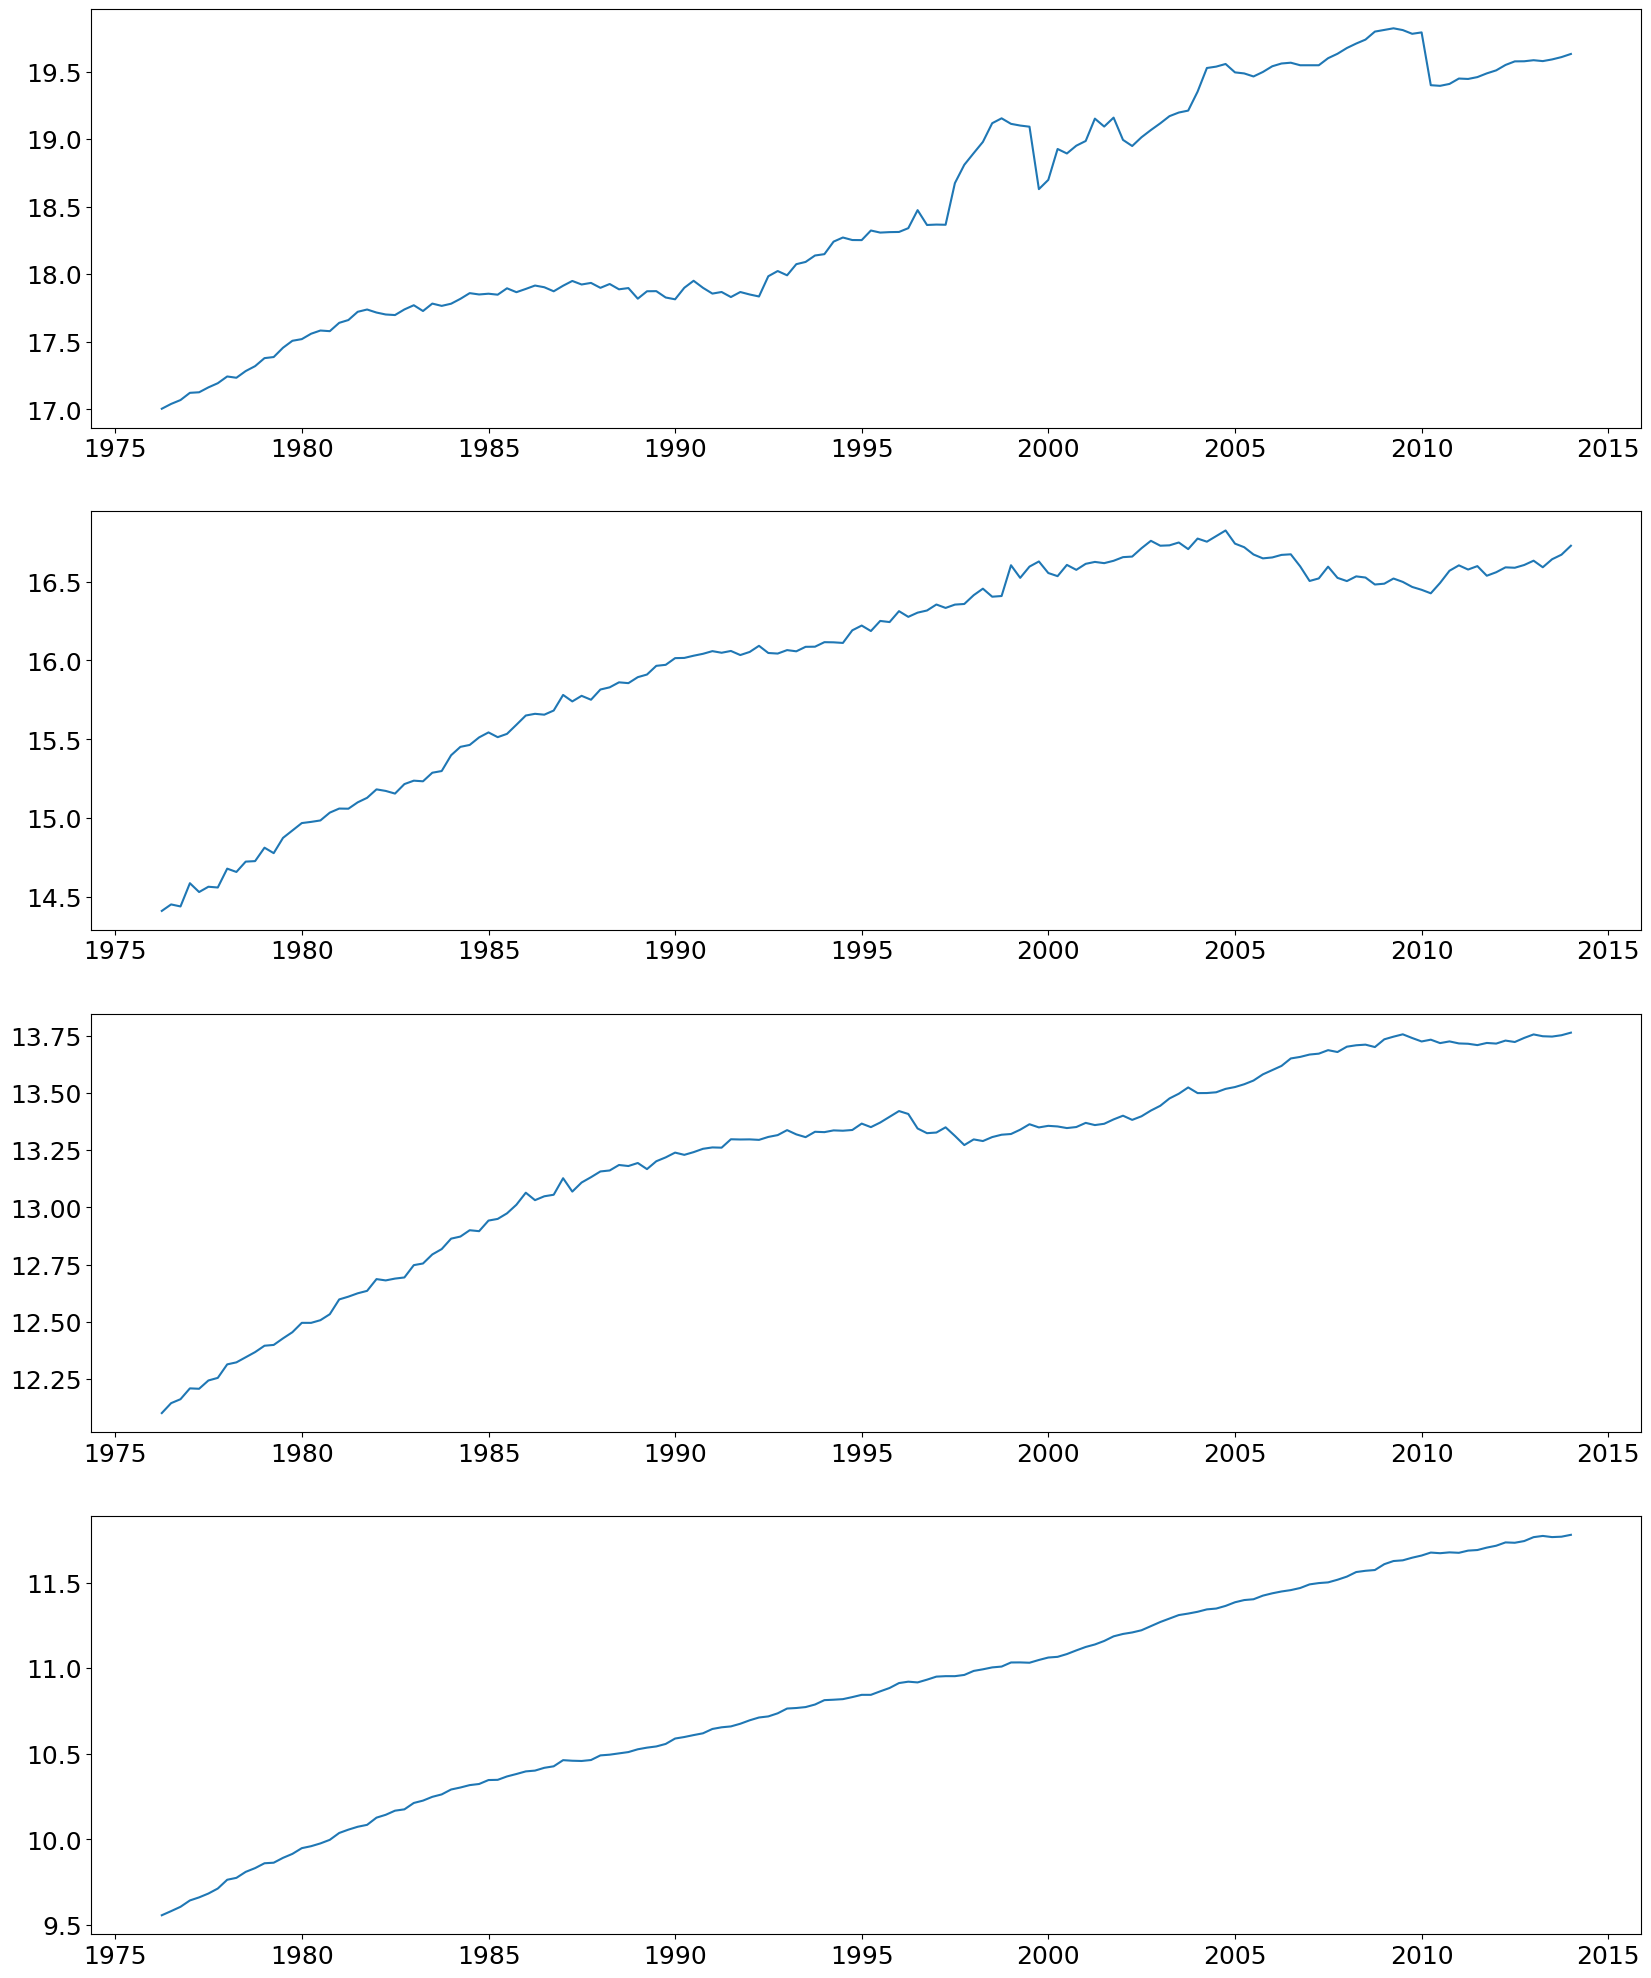

In [283]:
fig, ax = plt.subplots(4,1,figsize=(20,25))
ax = ax.ravel()

for i in range(4):
    ax[i].plot(np.log(array_cat_median[i]))

Share by position

Assets

In [284]:


# arrays to save share

array_assets_share = [pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame()]
array_liabs_share = [pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame()]

Text(0.5, 1.0, 'Top 10')

Text(0, 0.5, 'Share of total assets')

Text(0.5, 1.0, 'Top 11-100')

Text(0, 0.5, 'Share of total assets')

Text(0.5, 1.0, 'Top 101-1000')

Text(0, 0.5, 'Share of total assets')

Text(0.5, 1.0, 'Top 1000-∞')

Text(0, 0.5, 'Share of total assets')

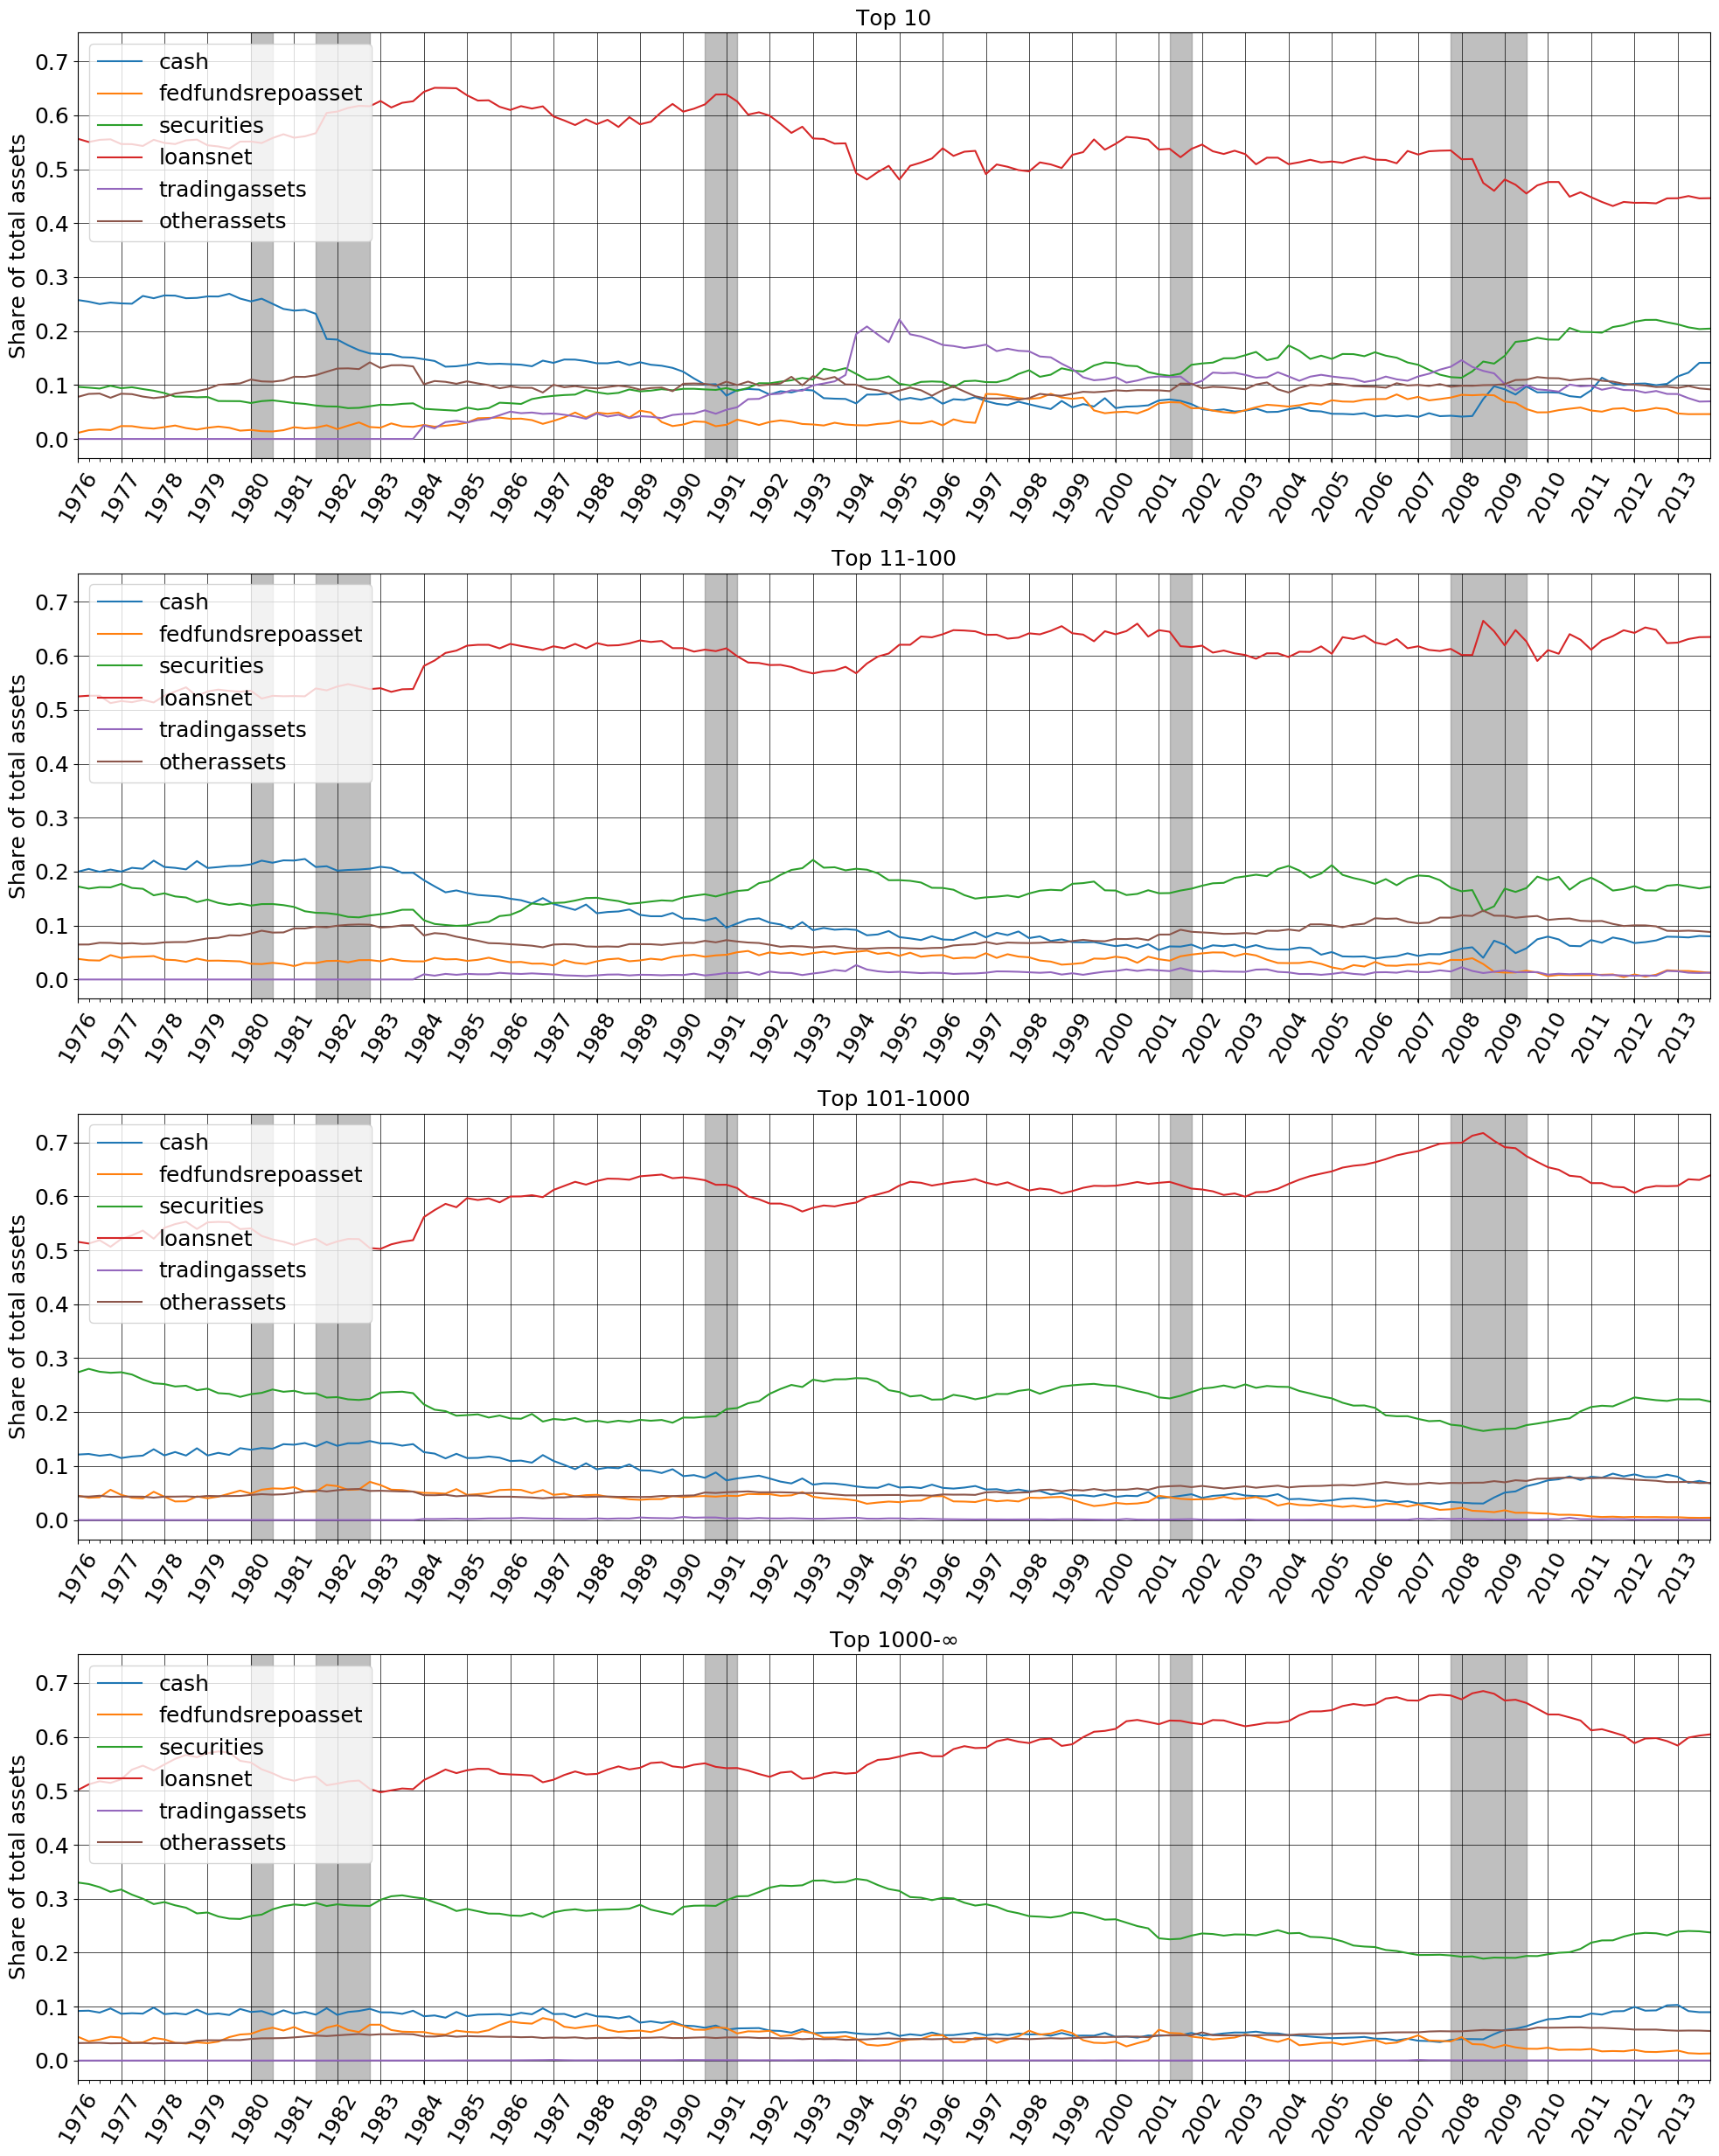

In [285]:
fig, ax = plt.subplots(4,1,figsize=(20,25), sharey=True)
ax = ax.ravel()



for i in range(4):
    columns = array_cats_asset_raw[i].iloc[:,3:].columns.values
    for column in columns:
        #compute share
        temp_share = array_cats_asset_raw[i][column]/array_cats_asset_raw[i].assets
        #save share
        array_assets_share[i][column] = temp_share
        #plot share
        ax[i].plot(temp_share)
    ax[i].legend(columns, loc="upper left") 
    ax[i].set_title(categories[i])
    ax[i].set_ylabel("Share of total assets")
    axsetting(ax[i])
    



save("cat_assets_share")

Liabs

In [286]:
array_cats_liab_raw[0].columns

Index(['year', 'quarter', 'assets', 'equity', 'fedfundsrepoliab', 'deposits', 'foreigndep', 'otherborrowedmoney', 'tradingliabilities', 'subordinateddebt', 'otherliab'], dtype='object')

Text(0.5, 1.0, 'Top 10')

Text(0, 0.5, 'Share of total assets')

Text(0.5, 1.0, 'Top 11-100')

Text(0, 0.5, 'Share of total assets')

Text(0.5, 1.0, 'Top 101-1000')

Text(0, 0.5, 'Share of total assets')

Text(0.5, 1.0, 'Top 1000-∞')

Text(0, 0.5, 'Share of total assets')

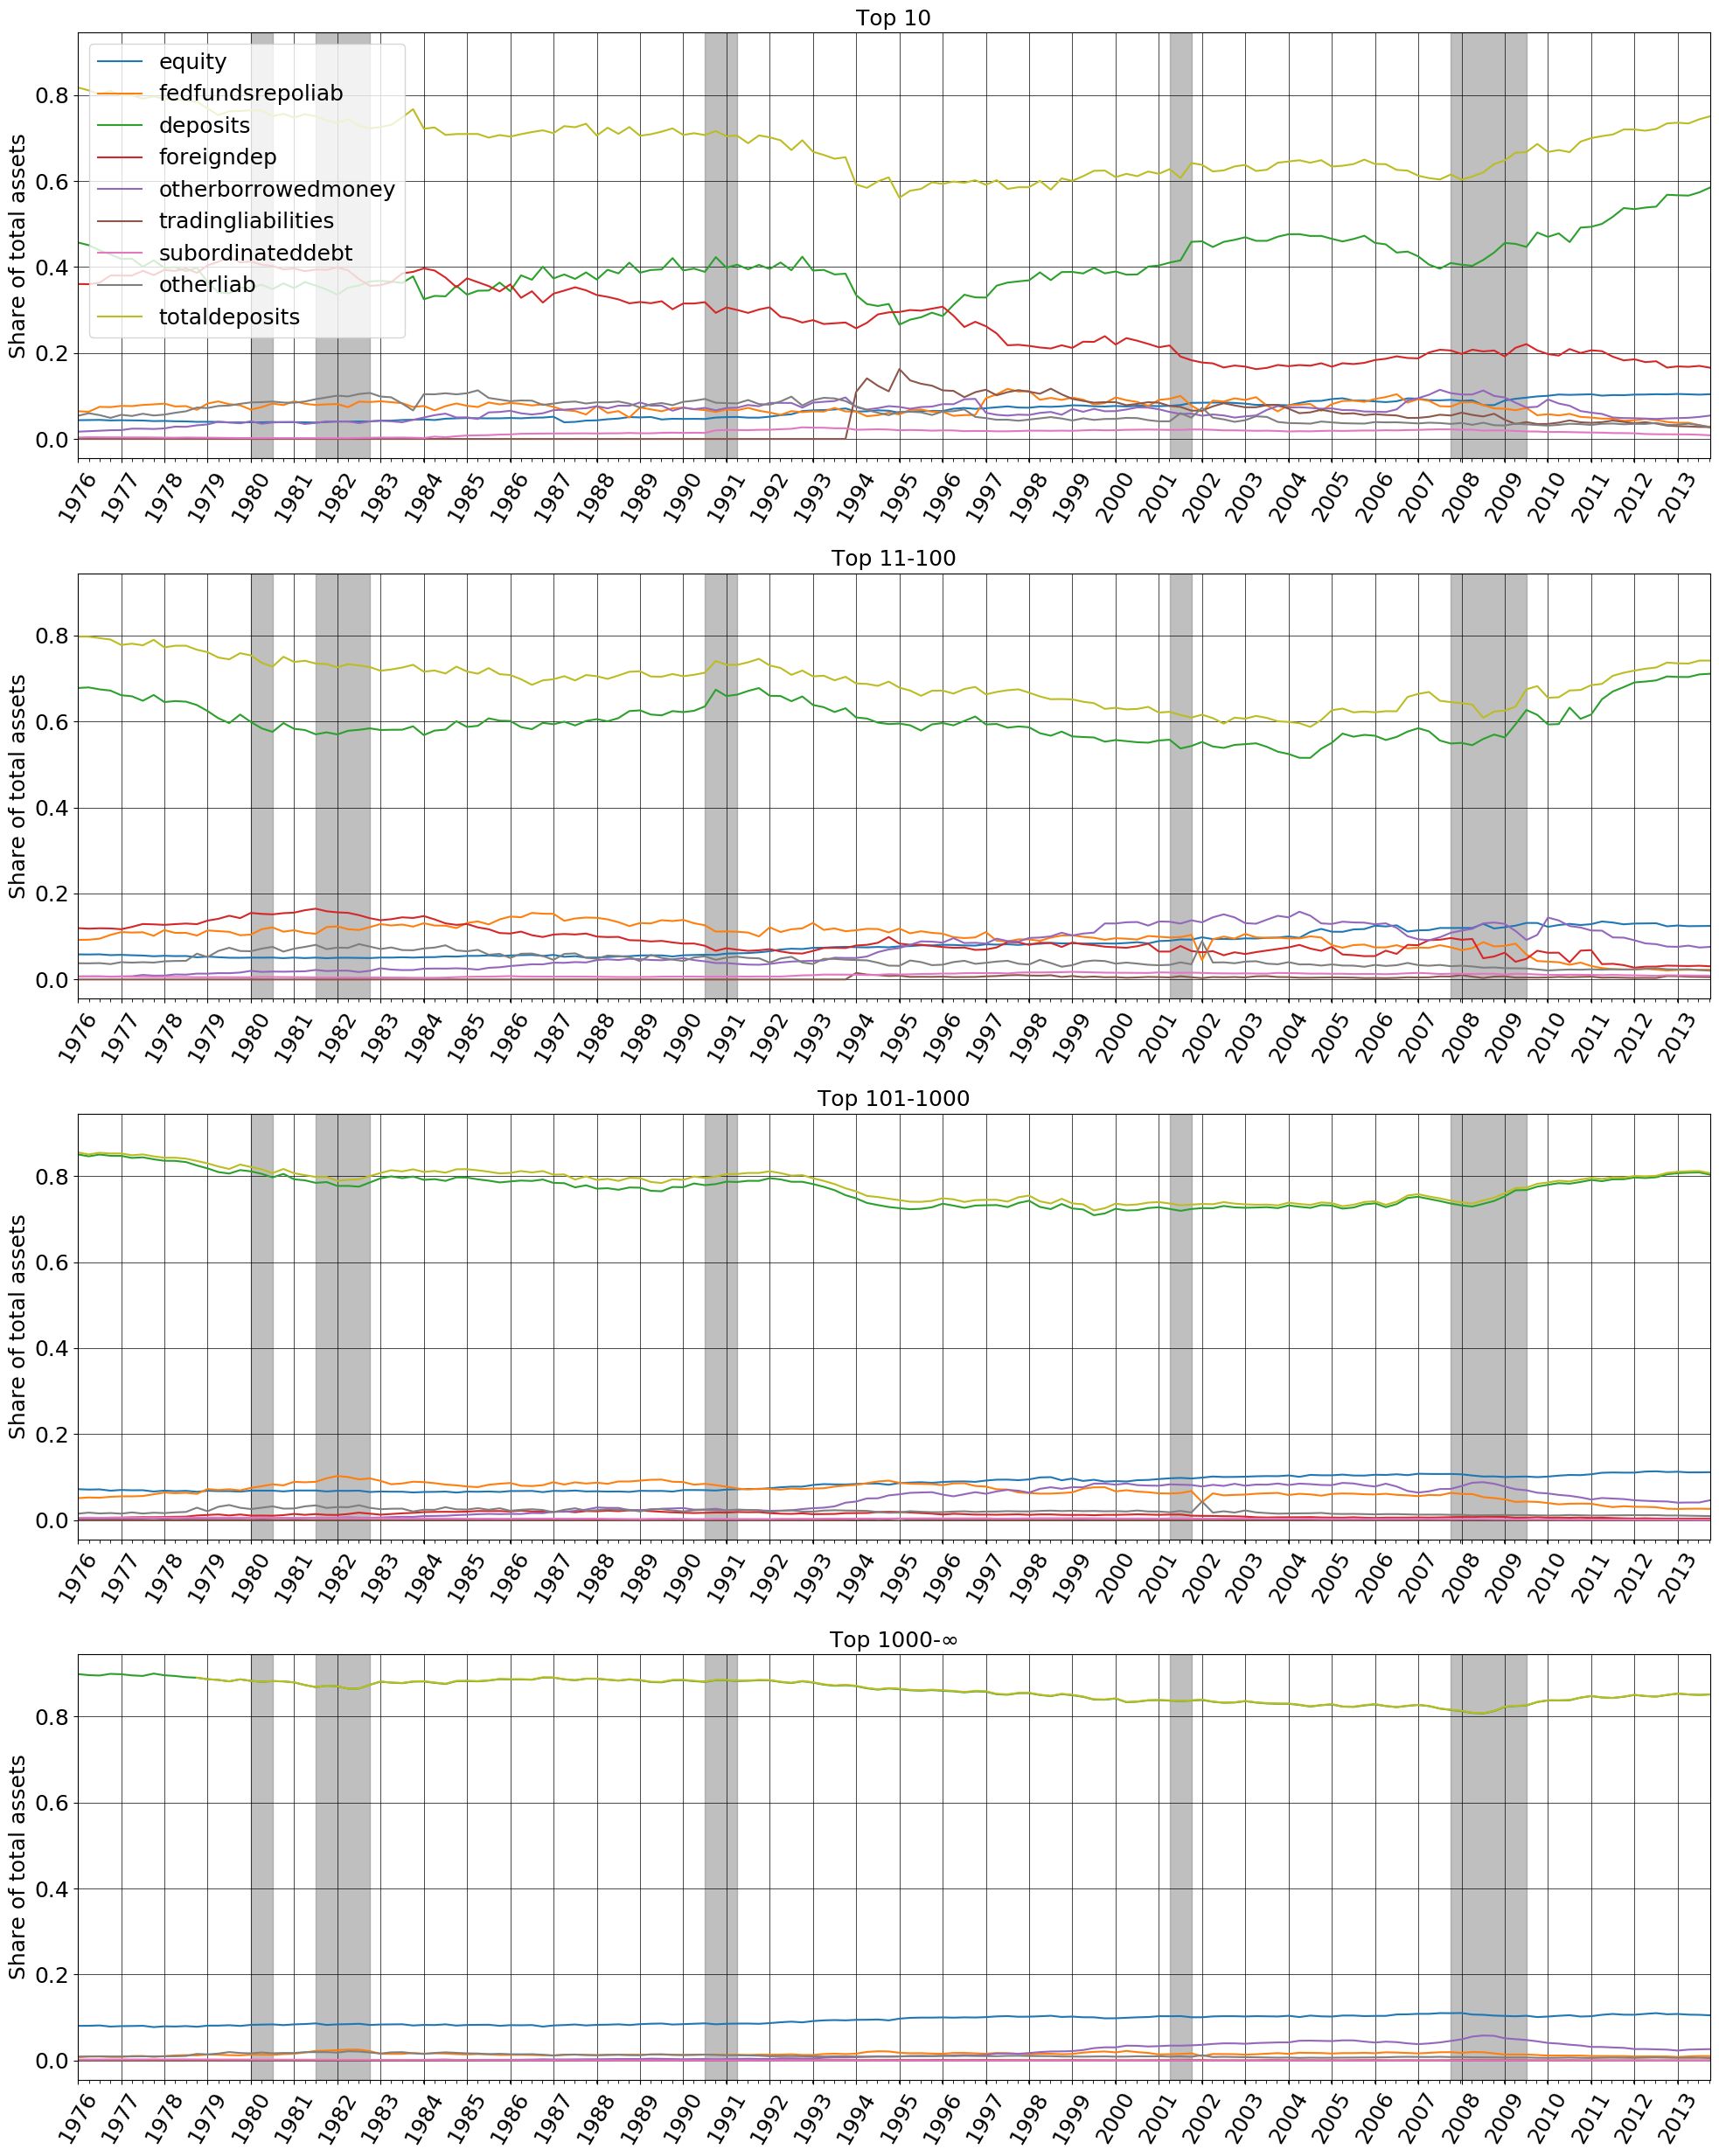

In [287]:
fig, ax = plt.subplots(4,1,figsize=(20,25), sharey=True)
ax = ax.ravel()

#array_cats_asset_raw


for i in range(4):
    columns = array_cats_liab_raw[i].iloc[:,3:].columns.values
    for column in columns:
            temp_share = array_cats_liab_raw[i][column]/array_cats_liab_raw[i].assets
            array_liabs_share[i][column] = temp_share
            ax[i].plot(temp_share)
    #ax[i].legend(columns, loc="upper left")
    ax[i].set_title(categories[i])
    ax[i].set_ylabel("Share of total assets")
    axsetting(ax[i])
 
for j in range(len(array_liabs_share)):
    array_liabs_share[j]["totaldeposits"] = array_liabs_share[j].deposits + array_liabs_share[j].foreigndep
    ax[j].plot(array_liabs_share[j]["totaldeposits"])
    #columns = np.append(columns, "totaldeposits")
    #ax[j].legend(columns, loc="upper left")
    
columns = np.append(columns, "totaldeposits")
ax[0].legend(columns, loc="upper left")
    
save("cat_liabs_share")

In [288]:
for df_share in array_assets_share:
    df_share.corr()

cash  fedfundsrepoasset  securities  loansnet  tradingassets  otherassets
cash                1.0              -0.72       -0.53      0.31          -0.83        0.071
fedfundsrepoasset -0.72                1.0        0.58     -0.52            0.6        -0.24
securities        -0.53               0.58         1.0     -0.84           0.49        -0.12
loansnet           0.31              -0.52       -0.84       1.0          -0.55         0.25
tradingassets     -0.83                0.6        0.49     -0.55            1.0        -0.36
otherassets       0.071              -0.24       -0.12      0.25          -0.36          1.0

cash  fedfundsrepoasset  securities  loansnet  tradingassets  otherassets
cash                1.0               0.15       -0.63     -0.83          -0.84        -0.25
fedfundsrepoasset  0.15                1.0       0.028     -0.24           0.13        -0.65
securities        -0.63              0.028         1.0      0.18           0.48        0.011
loansnet          -0.83              -0.24        0.18       1.0            0.7        0.072
tradingassets     -0.84               0.13        0.48       0.7            1.0        0.022
otherassets       -0.25              -0.65       0.011     0.072          0.022          1.0

cash  fedfundsrepoasset  securities  loansnet  tradingassets  otherassets
cash                1.0               0.59       0.094     -0.81          -0.14        -0.52
fedfundsrepoasset  0.59                1.0        0.23     -0.68          0.039        -0.77
securities        0.094               0.23         1.0     -0.63          -0.43        -0.26
loansnet          -0.81              -0.68       -0.63       1.0           0.36         0.53
tradingassets     -0.14              0.039       -0.43      0.36            1.0        -0.24
otherassets       -0.52              -0.77       -0.26      0.53          -0.24          1.0

cash  fedfundsrepoasset  securities  loansnet  tradingassets  otherassets
cash                 1.0               0.15        0.25     -0.61          -0.29       -0.071
fedfundsrepoasset   0.15                1.0        0.45     -0.62           0.39        -0.47
securities          0.25               0.45         1.0     -0.88           0.13        -0.79
loansnet           -0.61              -0.62       -0.88       1.0         -0.089         0.62
tradingassets      -0.29               0.39        0.13    -0.089            1.0       -0.079
otherassets       -0.071              -0.47       -0.79      0.62         -0.079          1.0

In [289]:
for df_share in array_liabs_share:
    df_share.corr()

equity  fedfundsrepoliab  deposits  foreigndep  otherborrowedmoney  tradingliabilities  subordinateddebt  otherliab  totaldeposits
equity                 1.0              -0.2      0.67       -0.94                0.42                0.54              0.59      -0.83          -0.55
fedfundsrepoliab      -0.2               1.0     -0.37       0.054              -0.097                0.18             0.028      0.033          -0.29
deposits              0.67             -0.37       1.0       -0.64              -0.039              -0.096              0.11      -0.62           0.16
foreigndep           -0.94             0.054     -0.64         1.0                -0.5                -0.6             -0.73       0.78           0.66
otherborrowedmoney    0.42            -0.097    -0.039        -0.5                 1.0                0.34              0.78       -0.2          -0.68
tradingliabilities    0.54              0.18    -0.096        -0.6                0.34                 1.0              0.61      -0.57          -0.86
subordinateddebt      0.59             0.028      0.11       -0.73                0.78                0.61               1.0      -0.41          -0.83
otherliab            -0.83             0.033     -0.62        0.78                -0.2               -0.57             -0.41        1.0            0.4
totaldeposits        -0.55             -0.29      0.16        0.66               -0.68               -0.86             -0.83        0.4            1.0

equity  fedfundsrepoliab  deposits  foreigndep  otherborrowedmoney  tradingliabilities  subordinateddebt  otherliab  totaldeposits
equity                 1.0             -0.86    -0.067       -0.79                 0.8                0.63              0.64      -0.78          -0.58
fedfundsrepoliab     -0.86               1.0     -0.25        0.62               -0.54               -0.49              -0.4       0.65           0.19
deposits            -0.067             -0.25       1.0       -0.17               -0.51               -0.29             -0.47      -0.17           0.76
foreigndep           -0.79              0.62     -0.17         1.0               -0.71               -0.54             -0.63       0.79           0.52
otherborrowedmoney     0.8             -0.54     -0.51       -0.71                 1.0                 0.7              0.87      -0.64          -0.91
tradingliabilities    0.63             -0.49     -0.29       -0.54                 0.7                 1.0              0.79      -0.59          -0.61
subordinateddebt      0.64              -0.4     -0.47       -0.63                0.87                0.79               1.0      -0.61          -0.82
otherliab            -0.78              0.65     -0.17        0.79               -0.64               -0.59             -0.61        1.0           0.38
totaldeposits        -0.58              0.19      0.76        0.52               -0.91               -0.61             -0.82       0.38            1.0

equity  fedfundsrepoliab  deposits  foreigndep  otherborrowedmoney  tradingliabilities  subordinateddebt  otherliab  totaldeposits
equity                 1.0             -0.74     -0.54        -0.7                0.84                0.32             -0.61      -0.72          -0.64
fedfundsrepoliab     -0.74               1.0      -0.1        0.83               -0.39              -0.038              0.48       0.71          0.024
deposits             -0.54              -0.1       1.0      -0.044               -0.86               -0.36              0.24       0.11           0.99
foreigndep            -0.7              0.83    -0.044         1.0               -0.38             -0.0066              0.18       0.65           0.11
otherborrowedmoney    0.84             -0.39     -0.86       -0.38                 1.0                0.34             -0.44      -0.51          -0.92
tradingliabilities    0.32            -0.038     -0.36     -0.0066                0.34                 1.0             -0.16      -0.28          -0.36
subordinateddebt     -0.61              0.48      0.24        0.18               -0.44               -0.16               1.0       0.57           0.27
otherliab            -0.72              0.71      0.11        0.65               -0.51               -0.28              0.57        1.0            0.2
totaldeposits        -0.64             0.024      0.99        0.11               -0.92               -0.36              0.27        0.2            1.0

equity  fedfundsrepoliab  deposits  foreigndep  otherborrowedmoney  tradingliabilities  subordinateddebt  otherliab  totaldeposits
equity                 1.0              0.17     -0.92        0.15                0.87                0.52             -0.73      -0.75           -0.9
fedfundsrepoliab      0.17               1.0     -0.37        0.14                0.17               0.011             -0.18       0.24          -0.24
deposits             -0.92             -0.37       1.0      -0.057               -0.96               -0.33              0.61       0.62            1.0
foreigndep            0.15              0.14    -0.057         1.0               0.024                 0.2             -0.55      -0.23         -0.044
otherborrowedmoney    0.87              0.17     -0.96       0.024                 1.0                0.25             -0.57      -0.73          -0.97
tradingliabilities    0.52             0.011     -0.33         0.2                0.25                 1.0              -0.4      -0.37          -0.29
subordinateddebt     -0.73             -0.18      0.61       -0.55               -0.57                -0.4               1.0       0.57            0.5
otherliab            -0.75              0.24      0.62       -0.23               -0.73               -0.37              0.57        1.0           0.72
totaldeposits         -0.9             -0.24       1.0      -0.044               -0.97               -0.29               0.5       0.72            1.0

Leverage by category

In [290]:
array_cat_group_liab[1]

date  rssdid   bhcid                 name  year  quarter  assets  equity  fedfundsrepoliab  deposits  foreigndep  otherborrowedmoney  tradingliabilities  subordinateddebt  liabilities
648277  1976-03-31 4.5e+05   1e+06    WELLS FARGO BK NA 2e+03      1.0 1.2e+07 5.1e+05           8.3e+05   8.9e+06     9.4e+05             9.3e+04                 nan           7.5e+04      1.1e+07
595866  1976-03-31 4.1e+05   1e+06  MARINE MIDLAND BANK 2e+03      1.0 1.1e+07 5.4e+05           3.2e+05   6.8e+06     2.6e+06             3.8e+04                 nan           3.1e+04        1e+07
1002039 1976-03-31   7e+05   1e+06           CROCKER NB 2e+03      1.0 9.9e+06 3.8e+05           4.3e+05   7.5e+06     1.1e+06               2e+04                 nan             6e+04      9.5e+06
963007  1976-03-31 6.7e+05   1e+06         UNITED CA BK 2e+03      1.0 9.1e+06 3.8e+05           5.5e+05   5.7e+06     1.8e+06             1.2e+05                 nan             7e+04      8.8e+06
1357503 1976-03-31 9.3e+05 1.1e+06         MELLON BK NA 2e+03      1.0 8.9e+06 5.8e+05           9.4e+05   4.8e+06     2.1e+06             5.5e+04                 nan               0.0      8.3e+06
...            ...     ...     ...                  ...   ...      ...     ...     ...               ...       ...         ...                 ...                 ...               ...          ...
1466642 2013-12-31   1e+06 1.2e+06     FIRST MIDWEST BK 2e+03      4.0 8.1e+06 1.1e+06           1.1e+05   6.8e+06         0.0             1.1e+05                 0.0               0.0      7.1e+06
353789  2013-12-31 2.5e+05 2.5e+06          ORIENTAL BK 2e+03      4.0 8.1e+06 8.7e+05           1.3e+06   5.4e+06         0.0             3.4e+05             3.2e+03           6.4e+04      7.2e+06
966712  2013-12-31 6.7e+05 2.2e+06             DORAL BK 2e+03      4.0   8e+06   7e+05               0.0     5e+06         0.0               2e+06                 0.0               0.0      7.3e+06
778553  2013-12-31 5.4e+05 1.1e+06                 SCBT 2e+03      4.0 7.9e+06 1.1e+06           2.1e+05   6.6e+06         0.0             2.1e+03                 0.0               0.0      6.9e+06
1551132 2013-12-31 2.6e+06   2e+06           GLACIER BK 2e+03      4.0 7.9e+06   1e+06           3.1e+05   5.6e+06         0.0             8.5e+05                 0.0               0.0      6.8e+06

[13680 rows x 15 columns]

Scatterplot: Average Leverage

Text(0.5, 1.0, 'cat:1 corr=0.21 sig=0.009')

Text(0, 0.5, 'Cyclical Leverage')

Text(0.5, 0, 'Cyclical Asset')

Text(0.5, 1.0, 'cat:2 corr=0.47 sig=0.0')

Text(0, 0.5, 'Cyclical Leverage')

Text(0.5, 0, 'Cyclical Asset')

Text(0.5, 1.0, 'cat:3 corr=0.02 sig=0.85')

Text(0, 0.5, 'Cyclical Leverage')

Text(0.5, 0, 'Cyclical Asset')

Text(0.5, 1.0, 'cat:4 corr=0.15 sig=0.067')

Text(0, 0.5, 'Cyclical Leverage')

Text(0.5, 0, 'Cyclical Asset')

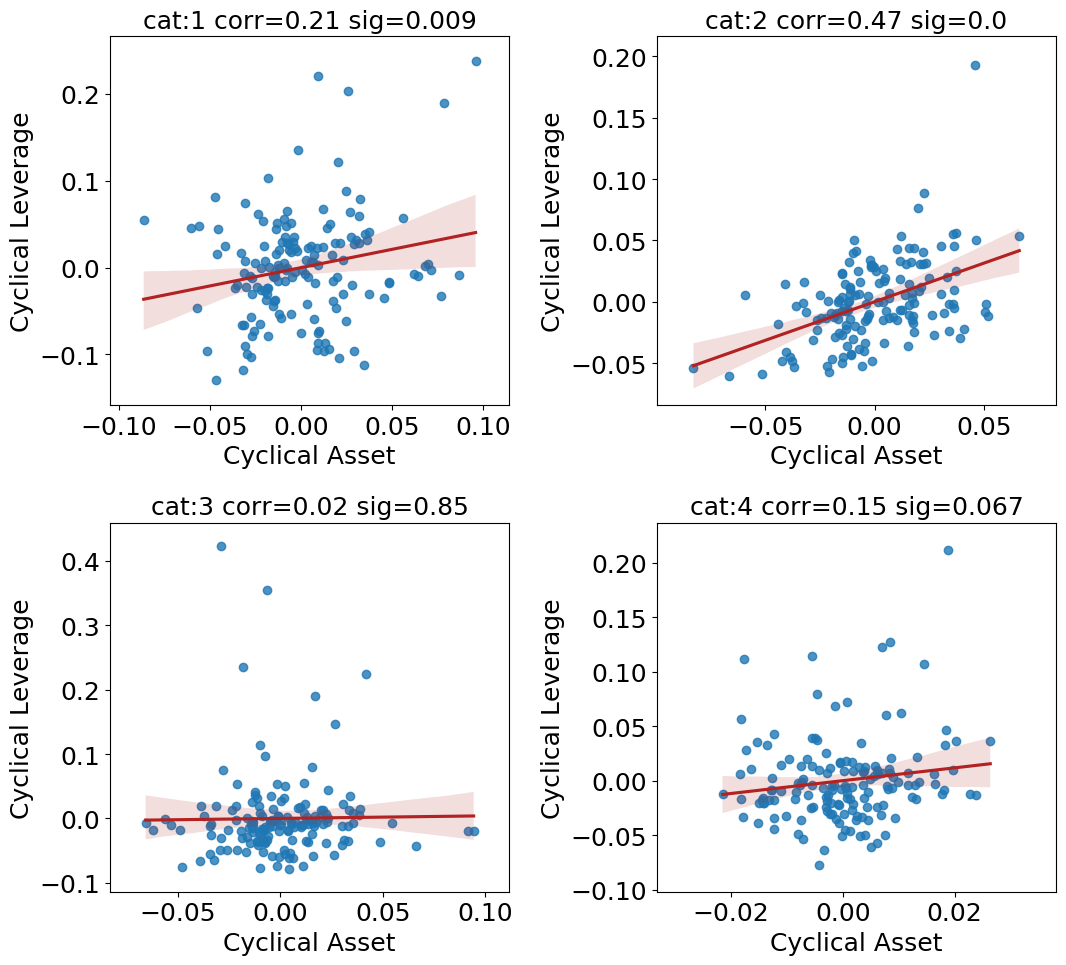

In [291]:
for cat in array_cat_group_liab:
    cat["leverage"] = cat.assets/cat.equity

for x in range(len(array_cat_group_liab)):
    array_cat_group_liab[x] = array_cat_group_liab[x][array_cat_group_liab[x].leverage > 0]

for cat in array_cat_group_liab:
    cat.leverage.replace([np.inf, -np.inf], np.nan, inplace=True)
    cat.dropna(how="all", subset=["leverage"], inplace=True)
    
array_cats_liab_raw_mean = []
array_cats_liab_raw_sum = []
    
for cat in array_cat_group_liab:
    copy = cat.copy()
    copy1 = cat.copy()
    array_cats_liab_raw_mean.append(copy.groupby("date").mean())
    array_cats_liab_raw_sum.append(copy1.groupby("date").sum())

    
fig, ax = plt.subplots(2,2, figsize=(11,10))
ax = ax.ravel()

count_cat = 4

for i in range(count_cat):
    cycle_leverage1, trend_leverage = sm.tsa.filters.hpfilter(np.log(array_cats_liab_raw_mean[i].leverage), 1600)
    
    cycle_assets1, trend_leverage = sm.tsa.filters.hpfilter(np.log(array_cats_liab_raw_mean[i].assets), 1600)
    
    sns.regplot(x=cycle_assets1, y=cycle_leverage1, ax=ax[i], line_kws={"color":'firebrick'})
    
    tuple_corr = scipy.pearsonr(cycle_leverage1, cycle_assets1)
    
    ax[i].set_title("cat:" + str(i+1) +  " corr=" + str(tuple_corr[0].round(2)) + " sig=" + str(tuple_corr[1].round(3)))
    
    ax[i].set_ylabel("Cyclical Leverage")
    
    ax[i].set_xlabel("Cyclical Asset")

    
#array_cats_liab_raw_mean
    
plt.tight_layout()
plt.savefig('LatexVorlage/graphs/DescriptiveStats/BanksbyAssetsCategory_ScatterAverageLeveragevsAverageAssetsCat_7613.png')

In [292]:
array_cats_liab_raw_sum[3].assets

date
1976-03-31   2.7e+08
1976-06-30   2.8e+08
1976-09-30   2.9e+08
1976-12-31     3e+08
1977-03-31     3e+08
1977-06-30   3.1e+08
1977-09-30   3.2e+08
1977-12-31   3.4e+08
1978-03-31   3.4e+08
1978-06-30   3.5e+08
1978-09-30   3.6e+08
1978-12-31   3.7e+08
1979-03-31   3.7e+08
1979-06-30   3.8e+08
1979-09-30   3.9e+08
1979-12-31     4e+08
1980-03-31   4.1e+08
1980-06-30   4.1e+08
1980-09-30   4.2e+08
1980-12-31   4.4e+08
1981-03-31   4.5e+08
1981-06-30   4.6e+08
1981-09-30   4.6e+08
1981-12-31   4.8e+08
1982-03-31   4.9e+08
1982-06-30     5e+08
1982-09-30   5.1e+08
1982-12-31   5.2e+08
1983-03-31   5.4e+08
1983-06-30   5.5e+08
1983-09-30   5.6e+08
1983-12-31   5.7e+08
1984-03-31   5.8e+08
1984-06-30   5.9e+08
1984-09-30   5.9e+08
1984-12-31   6.1e+08
1985-03-31   6.1e+08
1985-06-30   6.2e+08
1985-09-30   6.3e+08
1985-12-31   6.4e+08
1986-03-31   6.4e+08
1986-06-30   6.5e+08
1986-09-30   6.5e+08
1986-12-31   6.7e+08
1987-03-31   6.6e+08
1987-06-30   6.6e+08
1987-09-30   6.5e+08
1987-12-

In [293]:
array_cats_liab_raw_mean[3].assets

date
1976-03-31     2e+04
1976-06-30   2.1e+04
1976-09-30   2.1e+04
1976-12-31   2.2e+04
1977-03-31   2.3e+04
1977-06-30   2.3e+04
1977-09-30   2.4e+04
1977-12-31   2.5e+04
1978-03-31   2.5e+04
1978-06-30   2.6e+04
1978-09-30   2.7e+04
1978-12-31   2.8e+04
1979-03-31   2.8e+04
1979-06-30   2.9e+04
1979-09-30   2.9e+04
1979-12-31     3e+04
1980-03-31     3e+04
1980-06-30   3.1e+04
1980-09-30   3.2e+04
1980-12-31   3.3e+04
1981-03-31   3.3e+04
1981-06-30   3.4e+04
1981-09-30   3.5e+04
1981-12-31   3.6e+04
1982-03-31   3.6e+04
1982-06-30   3.7e+04
1982-09-30   3.8e+04
1982-12-31   3.9e+04
1983-03-31     4e+04
1983-06-30   4.1e+04
1983-09-30   4.1e+04
1983-12-31   4.3e+04
1984-03-31   4.3e+04
1984-06-30   4.4e+04
1984-09-30   4.4e+04
1984-12-31   4.5e+04
1985-03-31   4.5e+04
1985-06-30   4.6e+04
1985-09-30   4.7e+04
1985-12-31   4.8e+04
1986-03-31   4.8e+04
1986-06-30   4.9e+04
1986-09-30     5e+04
1986-12-31   5.2e+04
1987-03-31   5.1e+04
1987-06-30   5.1e+04
1987-09-30   5.2e+04
1987-12-

Scatterplot Average Leverage. Asset Cyclical lag=1

Text(0.5, 1.0, 'cat:1 corr=0.24 sig=0.003')

Text(0, 0.5, 'Cyclical Leverage')

Text(0.5, 0, 'Cyclical Asset')

Text(0.5, 1.0, 'cat:2 corr=0.36 sig=0.0')

Text(0, 0.5, 'Cyclical Leverage')

Text(0.5, 0, 'Cyclical Asset')

Text(0.5, 1.0, 'cat:3 corr=0.14 sig=0.097')

Text(0, 0.5, 'Cyclical Leverage')

Text(0.5, 0, 'Cyclical Asset')

Text(0.5, 1.0, 'cat:4 corr=0.16 sig=0.054')

Text(0, 0.5, 'Cyclical Leverage')

Text(0.5, 0, 'Cyclical Asset')

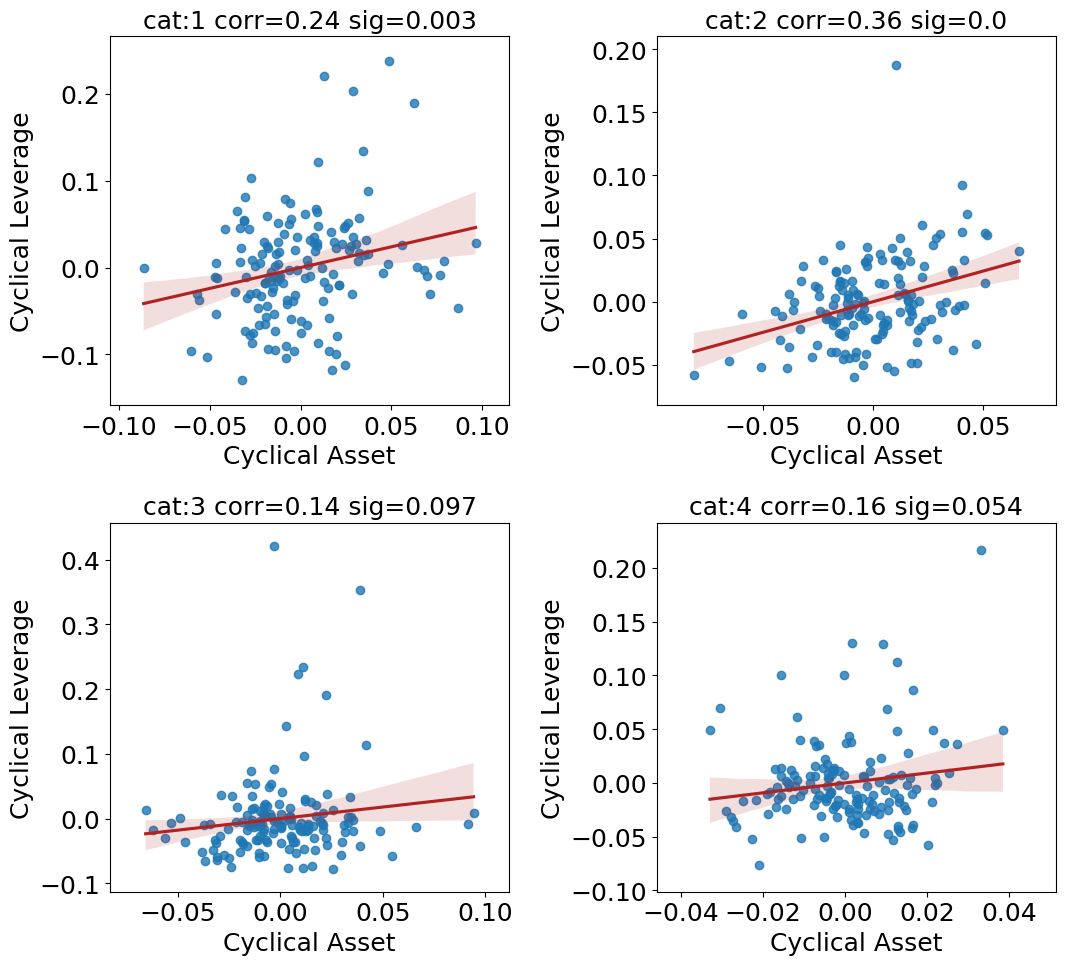

In [294]:
fig, ax = plt.subplots(2,2, figsize=(11,10))
ax = ax.ravel()

count_cat = 4

for i in range(count_cat):
    temp = array_cats_liab_raw_sum[i].shift(-3).dropna()
    cycle_leverage1, trend_leverage = sm.tsa.filters.hpfilter(np.log(temp.leverage), 1600)
    
    temp = array_cats_liab_raw_sum[i].assets
    cycle_assets1, trend_assets = sm.tsa.filters.hpfilter(np.log(array_cats_liab_raw_sum[i][:-3].assets), 1600)
    
    sns.regplot(x=cycle_assets1, y=cycle_leverage1, ax=ax[i], line_kws={"color":'firebrick'})
    
    tuple_corr = scipy.pearsonr(cycle_leverage1, cycle_assets1)
    
    ax[i].set_title("cat:" + str(i+1) +  " corr=" + str(tuple_corr[0].round(2)) + " sig=" + str(tuple_corr[1].round(3)))
    
    ax[i].set_ylabel("Cyclical Leverage")
    
    ax[i].set_xlabel("Cyclical Asset")
    
    
plt.tight_layout()


plt.savefig('LatexVorlage/graphs/DescriptiveStats/BanksbyAssetsCategory_ScatterAverageLeveragevsAggregateAssetsCat_7613.png')

Scatterplot: Aggregate Leverage

Text(0.5, 1.0, 'cat:1 corr=0.24 sig=0.003')

Text(0, 0.5, 'Cyclical Leverage')

Text(0.5, 0, 'Cyclical Asset')

Text(0.5, 1.0, 'cat:2 corr=0.44 sig=0.0')

Text(0, 0.5, 'Cyclical Leverage')

Text(0.5, 0, 'Cyclical Asset')

Text(0.5, 1.0, 'cat:3 corr=0.35 sig=0.0')

Text(0, 0.5, 'Cyclical Leverage')

Text(0.5, 0, 'Cyclical Asset')

Text(0.5, 1.0, 'cat:4 corr=0.34 sig=0.0')

Text(0, 0.5, 'Cyclical Leverage')

Text(0.5, 0, 'Cyclical Asset')

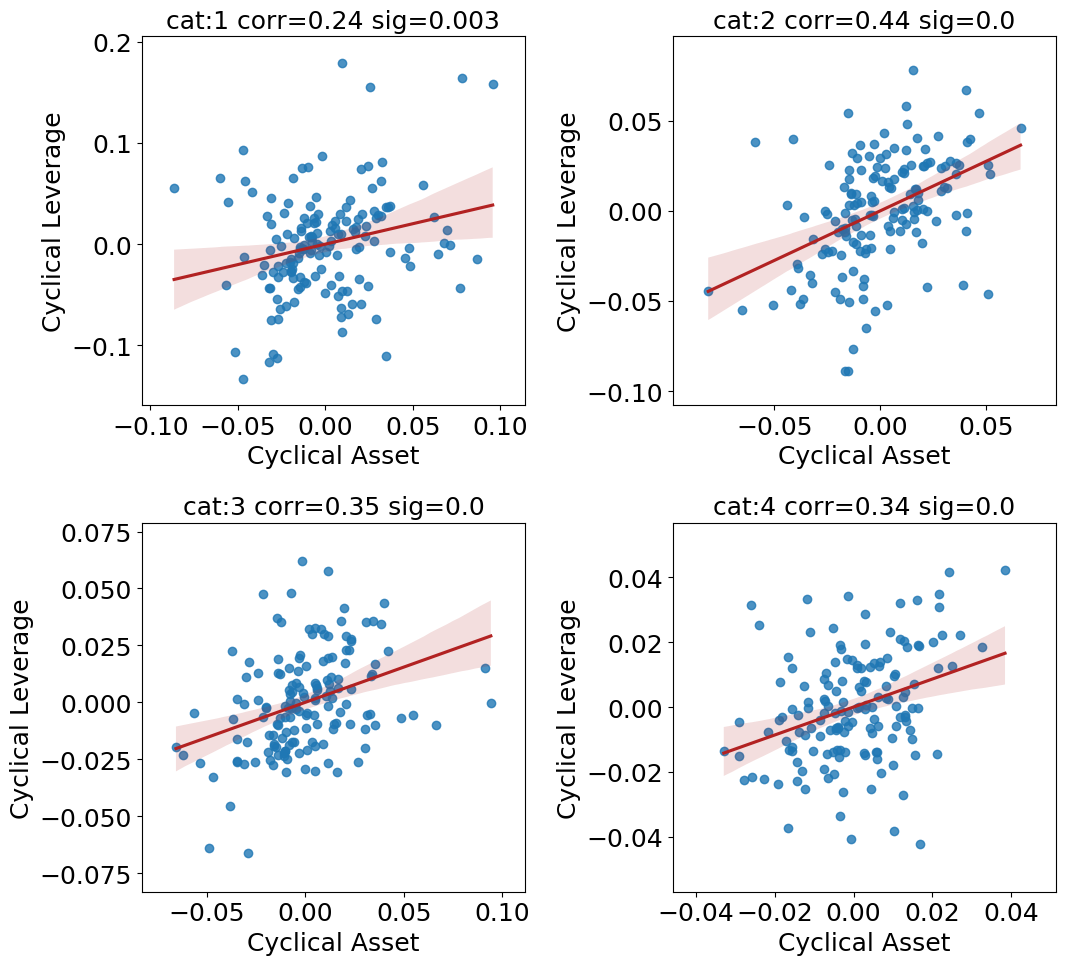

In [295]:
fig, ax = plt.subplots(2,2, figsize=(11,10))
ax = ax.ravel()

count_cat = 4

for i in range(count_cat):
    cycle_leverage, trend_leverage = sm.tsa.filters.hpfilter(np.log(array_cats_liab_raw_sum[i].assets/array_cats_liab_raw_sum[i].equity), 1600)
    
    cycle_assets, trend_leverage = sm.tsa.filters.hpfilter(np.log(array_cats_liab_raw_sum[i].assets), 1600)
    
    sns.regplot(x=cycle_assets, y=cycle_leverage, ax=ax[i], line_kws={"color":'firebrick'})
    
    tuple_corr = scipy.pearsonr(cycle_leverage, cycle_assets)
    
    ax[i].set_title("cat:" + str(i+1) +  " corr=" + str(tuple_corr[0].round(2)) + " sig=" + str(tuple_corr[1].round(3)))
    
    ax[i].set_ylabel("Cyclical Leverage")
    
    ax[i].set_xlabel("Cyclical Asset")
    
    
plt.tight_layout()


plt.savefig('LatexVorlage/graphs/DescriptiveStats/BanksbyAssetsCategory_ScatterAggregateLeveragevsAggregateAssetsCat_7613.png')

Procyclicality over time ranges

For Average Cyclical Computation

In [296]:


def compute_correlations(dataFrameArray):
    year_begin = 1980

    corr_per_range_cat = []

    #corr_per_range = []

    #loop for categories
    for i in range(4):
        #loop for time ranges
        corr_per_range = []
        year_begin = 1980
        temp = dataFrameArray[i]
        for j in range(3):
            #temp = dataFrameArray[i]
            #get range
            leverage_range = temp[(temp.index > str(year_begin)) & (temp.index < str(year_begin+10))].leverage
            asset_range = temp[(temp.index > str(year_begin)) & (temp.index < str(year_begin+10))].assets
    
            #compute cycle for range
            cycle_leverage, trend_all = sm.tsa.filters.hpfilter(np.log(leverage_range), 1600)
            cycle_assets, trend_all = sm.tsa.filters.hpfilter(np.log(asset_range), 1600)
            
            #add corr per range to array
            corr = scipy.pearsonr(cycle_leverage, cycle_assets)
            
            #round tuple numbers
            corr_per_range.append(tuple(round(x,3) for x in corr))
            #print(corr_per_range)
            
            #increment range year
            year_begin += 10
            
        #append to cat correlation array
        corr_per_range_cat.append(corr_per_range)
            

    array_ranges = ["1980-1990", "1990-2000", "2000-2010"]

    list_df = []

    for y in range(4):
        temp_df = pd.DataFrame(corr_per_range_cat[y], columns=['Correlation', "Significance"])
        
        temp_df["year_range"] = array_ranges
        temp_df = temp_df.set_index("year_range")
    
        list_df.append(temp_df)
    
    return pd.concat(list_df, keys=["Top 10 banks", "Large banks", "Medium banks", "Small banks"])

In [297]:
compute_correlations(array_cats_liab_raw_mean).to_latex("LatexVorlage/graphs/Tables/LatexTables/corr_average_range_cat.tex")

compute_correlations(array_cats_liab_raw_mean)


Correlation  Significance
             year_range                           
Top 10 banks 1980-1990          0.15          0.34
             1990-2000         0.075          0.65
             2000-2010           0.3         0.063
Large banks  1980-1990          0.25          0.12
             1990-2000          0.58           0.0
             2000-2010         0.072          0.66
Medium banks 1980-1990          0.23          0.16
             1990-2000        -0.041           0.8
             2000-2010         -0.26           0.1
Small banks  1980-1990         0.086           0.6
             1990-2000          0.36         0.022
             2000-2010        -0.086           0.6

In [298]:
for i in range(len(array_cats_liab_raw_sum)):
    array_cats_liab_raw_sum[i]["leverage"] = array_cats_liab_raw_sum[i]["assets"] / array_cats_liab_raw_sum[i]["equity"]

array_cats_liab_raw_sum[2].leverage

date
1976-03-31   1.4e+01
1976-06-30   1.4e+01
1976-09-30   1.4e+01
1976-12-31   1.5e+01
1977-03-31   1.4e+01
1977-06-30   1.4e+01
1977-09-30   1.4e+01
1977-12-31   1.5e+01
1978-03-31   1.5e+01
1978-06-30   1.5e+01
1978-09-30   1.5e+01
1978-12-31   1.5e+01
1979-03-31   1.5e+01
1979-06-30   1.5e+01
1979-09-30   1.5e+01
1979-12-31   1.5e+01
1980-03-31   1.5e+01
1980-06-30   1.5e+01
1980-09-30   1.5e+01
1980-12-31   1.5e+01
1981-03-31   1.5e+01
1981-06-30   1.5e+01
1981-09-30   1.5e+01
1981-12-31   1.5e+01
1982-03-31   1.5e+01
1982-06-30   1.5e+01
1982-09-30   1.5e+01
1982-12-31   1.5e+01
1983-03-31   1.5e+01
1983-06-30   1.5e+01
1983-09-30   1.5e+01
1983-12-31   1.6e+01
1984-03-31   1.5e+01
1984-06-30   1.5e+01
1984-09-30   1.5e+01
1984-12-31   1.6e+01
1985-03-31   1.5e+01
1985-06-30   1.5e+01
1985-09-30   1.5e+01
1985-12-31   1.5e+01
1986-03-31   1.5e+01
1986-06-30   1.5e+01
1986-09-30   1.5e+01
1986-12-31   1.5e+01
1987-03-31   1.5e+01
1987-06-30   1.5e+01
1987-09-30   1.4e+01
1987-12-

In [299]:
compute_correlations(array_cats_liab_raw_sum).to_latex("LatexVorlage/graphs/Tables/LatexTables/corr_agg_range_cat.tex")

compute_correlations(array_cats_liab_raw_sum)

Correlation  Significance
             year_range                           
Top 10 banks 1980-1990          0.21           0.2
             1990-2000          0.08          0.62
             2000-2010          0.37         0.018
Large banks  1980-1990          0.21          0.18
             1990-2000          0.67           0.0
             2000-2010          0.22          0.18
Medium banks 1980-1990          0.57           0.0
             1990-2000          0.48         0.002
             2000-2010         0.036          0.83
Small banks  1980-1990          0.56           0.0
             1990-2000          0.55           0.0
             2000-2010          -0.2          0.21

For Aggregate Cyclical Computation

In [300]:
import statsmodels.api as sm
from sklearn import preprocessing


x = cycle_assets
y = cycle_leverage

x = preprocessing.scale(x)
y = preprocessing.scale(y)

x = sm.add_constant(x)

model = sm.OLS(y,x)

results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.114
Model:                            OLS   Adj. R-squared:                  0.108
Method:                 Least Squares   F-statistic:                     19.25
Date:                Sat, 16 May 2020   Prob (F-statistic):           2.15e-05
Time:                        19:54:42   Log-Likelihood:                -206.50
No. Observations:                 152   AIC:                             417.0
Df Residuals:                     150   BIC:                             423.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.776e-17      0.077   3.61e-16      1.000      -0.152       0.152
x1             0.3373      0.077      4.388      0.000       0.185       0.489
==============================================================================
Omnibus:                        1.982   Durbin-Watson:                   0.885
Prob(Omnibus):                  0.371   Jarque-Bera (JB):                1.672
Skew:                          -0.072   Prob(JB):                        0.434
Kurtosis:                       3.493   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [301]:
df_assets

date  rssdid   bhcid                  name  year  quarter  assets    cash  fedfundsrepoasset  securities  loansnet  tradingassets
0       1986-03-31 2.8e+01     0.0     FIRST ATLANTIC BK 2e+03      1.0 2.8e+03 1.4e+03            1.1e+03         0.0   2.3e+01            0.0
1       1986-06-30 2.8e+01     0.0     FIRST ATLANTIC BK 2e+03      2.0 4.3e+03 1.5e+02            1.6e+03     4.1e+02   1.9e+03            0.0
2       1986-09-30 2.8e+01     0.0     FIRST ATLANTIC BK 2e+03      3.0 5.1e+03   6e+02            8.2e+02     4.1e+02     3e+03            0.0
3       1986-12-31 2.8e+01     0.0     FIRST ATLANTIC BK 2e+03      4.0 5.7e+03 2.9e+02              1e+03     6.1e+02   3.4e+03            0.0
4       1987-03-31 2.8e+01     0.0     FIRST ATLANTIC BK 2e+03      1.0 7.7e+03   7e+02            1.2e+03     6.1e+02   4.7e+03            0.0
...            ...     ...     ...                   ...   ...      ...     ...     ...                ...         ...       ...            ...
1609535 2013-09-30 4.3e+06     0.0    ALOSTAR BK OF CMRC 2e+03      3.0 7.7e+05 3.6e+04            1.9e+04     2.8e+05   3.8e+05            0.0
1609536 2013-12-31 4.3e+06     0.0    ALOSTAR BK OF CMRC 2e+03      4.0 8.1e+05 4.1e+04            2.4e+03     2.5e+05   4.7e+05            0.0
1609537 2013-12-31 4.5e+06     0.0  BANK OF BIRD-IN-HAND 2e+03      4.0 3.5e+04 1.2e+03            2.4e+04       4e+03   5.6e+03            0.0
1609538 2013-12-31 4.6e+06 1.1e+06     NEW TRADITIONS BK 2e+03      4.0 5.1e+05 1.7e+05                0.0       5e+03   3.2e+05            0.0
1609539 2013-12-31 4.6e+06     0.0        INVESCO NAT TC 2e+03      4.0 2.7e+05   2e+05                0.0         0.0       0.0            0.0

[1609497 rows x 12 columns]

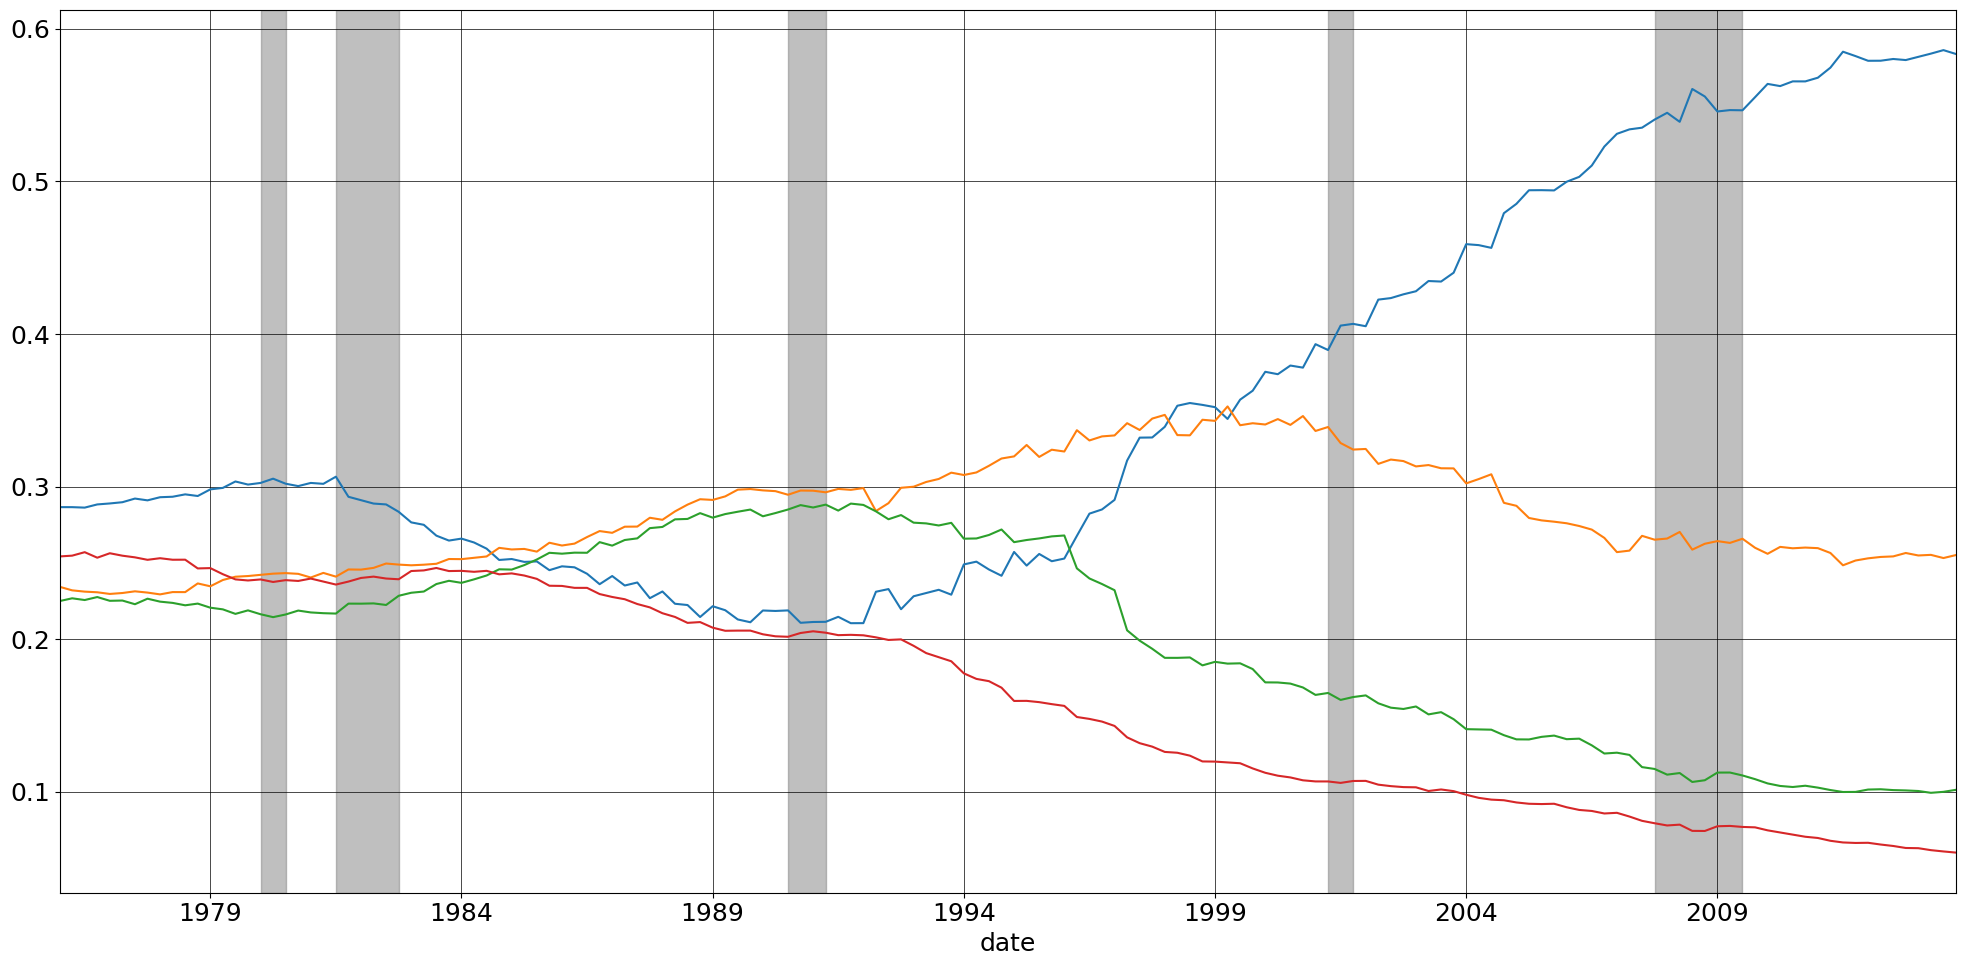

In [302]:
fig, ax = plt.subplots(figsize=(20,10))

df_assets_agg = df_assets.groupby("date").sum()

for cat in array_cats_asset_raw:
    cat["share_assets"] = cat["assets"]/df_assets_agg["assets"]
    cat["share_assets"].plot(ax=ax)


axsetting2(ax)

    
plt.tight_layout()
plt.savefig('LatexVorlage/graphs/DescriptiveStats/BanksbyAssetsCategory_ShareAssetsByCat_7613.png')